In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
# import ridge regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


import calendar
# set the options so I can see all the columns
pd.set_option('display.max_columns', None)

LendingClub's Structured Loan Certificates Program is a two-tranche private securitization in which LendingClub retains the senior note and sells the residual certificate on a pool of loans to a marketplace investor at a predetermined price, effectively providing built-in financing.  

In [2]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df = df[:-2]
df = df[df['loan_amnt'].isnull() == False]
df

/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_9230/3136534288.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN

In [3]:
missing_values = df.isnull().sum()
missing_values_no_nan = missing_values[missing_values <= 1000]
missing_values_no_nan_list = missing_values_no_nan.index.tolist()
df2 = df[missing_values_no_nan_list]
df2 = df2.dropna()
df2 = df2.drop_duplicates()

df2.set_index('id', inplace=True)

# for issue_d data, I want to separate the month and year, i want the month to be dec, nov, oct, etc
df2['issue_d'] = pd.to_datetime(df2['issue_d'])
df2['issue_d_month'] = df2['issue_d'].dt.month
# convert the month to a string
df2['issue_d_month'] = df2['issue_d_month'].apply(lambda x: calendar.month_abbr[x])
df2['issue_d_year'] = df2['issue_d'].dt.year
df2 = df2.drop(columns=['issue_d'])

# for earliest_cr_line, I want to separate the month and year, i want the month to be dec, nov, oct, etc
df2['earliest_cr_line'] = pd.to_datetime(df2['earliest_cr_line'])
df2['earliest_cr_line_month'] = df2['earliest_cr_line'].dt.month
# convert the month to a string
df2['earliest_cr_line_month'] = df2['earliest_cr_line_month'].apply(lambda x: calendar.month_abbr[x])
df2['earliest_cr_line_year'] = df2['earliest_cr_line'].dt.year
df2 = df2.drop(columns=['earliest_cr_line'])

# for last_credit_pull_d, I want to separate the month and year, i want the month to be dec, nov, oct, etc
df2['last_credit_pull_d'] = pd.to_datetime(df2['last_credit_pull_d'])
df2['last_credit_pull_d_month'] = df2['last_credit_pull_d'].dt.month
# convert the month to a string
df2['last_credit_pull_d_month'] = df2['last_credit_pull_d_month'].apply(lambda x: calendar.month_abbr[x])
df2['last_credit_pull_d_year'] = df2['last_credit_pull_d'].dt.year
df2 = df2.drop(columns=['last_credit_pull_d'])

# clean the `term` column to make it an integer 
df2['term'] = df2['term'].str.replace('months', '')
df2['term'] = df2['term'].astype(int)

# change pymnt_plan to binary, y = 1, n = 0
df2['pymnt_plan'] = df2['pymnt_plan'].replace('y', 1)
df2['pymnt_plan'] = df2['pymnt_plan'].replace('n', 0)

# change initial_list_status to binary, w = 1, f = 0
df2['initial_list_status'] = df2['initial_list_status'].replace('w', 1)
df2['initial_list_status'] = df2['initial_list_status'].replace('f', 0)

# change application_type to binary, Individual = 1, Joint App = 0
df2['application_type'] = df2['application_type'].replace('Individual', 1)
df2['application_type'] = df2['application_type'].replace('Joint App', 0)

# change hardship_flag to binary, Y = 1, N = 0
df2['hardship_flag'] = df2['hardship_flag'].replace('Y', 1)
df2['hardship_flag'] = df2['hardship_flag'].replace('N', 0)

# change disbursement_method to binary, Cash = 1, DirectPay = 0
df2['disbursement_method'] = df2['disbursement_method'].replace('Cash', 1)
df2['disbursement_method'] = df2['disbursement_method'].replace('DirectPay', 0)

# change debt_settlement_flag to binary, Y = 1, N = 0
df2['debt_settlement_flag'] = df2['debt_settlement_flag'].replace('Y', 1)
df2['debt_settlement_flag'] = df2['debt_settlement_flag'].replace('N', 0)


# drop the column url because it is a unique identifier
df2 = df2.drop(columns=['url'])

# drop the zip code column because it is not useful, but leave the address_state column
df2 = df2.drop(columns=['zip_code'])

# make the columns home_ownership, verification_status, loan_status, purpose, ussue_d, earliest_cr_line, last_credit_pull_d, addr_state, grade, and sub_grade into categorical columns
df2['home_ownership'] = df2['home_ownership'].astype('category')
df2['verification_status'] = df2['verification_status'].astype('category')
df2['loan_status'] = df2['loan_status'].astype('category')
df2['purpose'] = df2['purpose'].astype('category')
df2['addr_state'] = df2['addr_state'].astype('category')    
df2['grade'] = df2['grade'].astype('category')
df2['sub_grade'] = df2['sub_grade'].astype('category')

df2['issue_d_year'] = df2['issue_d_year'].astype('category')
df2['earliest_cr_line_year'] = df2['earliest_cr_line_year'].astype('category')
df2['last_credit_pull_d_year'] = df2['last_credit_pull_d_year'].astype('category')

df2['issue_d_month'] = df2['issue_d_month'].astype('category')
df2['earliest_cr_line_month'] = df2['earliest_cr_line_month'].astype('category')
df2['last_credit_pull_d_month'] = df2['last_credit_pull_d_month'].astype('category')

df2['term'] = df2['term'].astype('category')
df2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,0,debt_consolidation,PA,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,13.0,1,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,122.67,564.0,560.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2003,Mar,2019
68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,0,small_business,SD,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,38.0,1,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,926.35,699.0,695.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Dec,1999,Mar,2019
68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,0,home_improvement,IL,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,18.0,1,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.00,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2000,Mar,2019
66310712,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,MORTGAGE,110000.0,Source Verified,Current,0,debt_consolidation,NJ,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,17.0,1,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.00,0.0,0.0,829.90,679.0,675.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Sep,2008,Mar,2019
68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,0,major_purchase,PA,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,35.0,1,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.00,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Jun,1998,Mar,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89885898,24000.0,24000.0,24000.0,60,12.79,543.50,C,C1,MORTGAGE,95000.0,Source Verified,Current,0,home_improvement,AL,0.0,665.0,669.0,0.0,5.0,0.0,49431.0,54.0,0,14287.39,14287.39,15760.500000,15760.50,9712.61,6047.89,0.00,0.0,0.0,543.50,709.0,705.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Dec,1999,Mar,2019
88977788,24000.0,24000.0,24000.0,60,10.49,515.74,B,B3,MORTGAGE,108000.0,Not Verified,Current,0,debt_consolidation,UT,0.0,695.0,699.0,1.0,24.0,1.0,21665.0,58.0,0,13951.42,13951.42,15008.530000,15008.53,10048.58,4959.95,0.00,0.0,0.0,515.74,734.0,730.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0,1,0,Oct,2016,Feb,1991,Mar,2019
88985880,40000.0,40000.0,40000.0,60,10.49,859.56,B,B3,MORTGAGE,227000.0,Verified,Current,0,debt_consolidation,CA,7.0,705.0,709.0,1.0,5.0,0.0,8633.0,37.0,0,23252.59,23252.59,24903.930000,24903.93,16747.41,8156.52,0.00,0.0,0.0,859.56,724.0,720.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Feb,1995,Mar,2019


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260451 entries, 68407277 to 88215728
Data columns (total 52 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   loan_amnt                   float64 
 1   funded_amnt                 float64 
 2   funded_amnt_inv             float64 
 3   term                        category
 4   int_rate                    float64 
 5   installment                 float64 
 6   grade                       category
 7   sub_grade                   category
 8   home_ownership              category
 9   annual_inc                  float64 
 10  verification_status         category
 11  loan_status                 category
 12  pymnt_plan                  int64   
 13  purpose                     category
 14  addr_state                  category
 15  delinq_2yrs                 float64 
 16  fico_range_low              float64 
 17  fico_range_high             float64 
 18  inq_last_6mths              float64 
 1

In [5]:
df2['grade'].value_counts()

B    663507
C    650009
A    432976
D    324395
E    135616
F     41787
G     12161
Name: grade, dtype: int64

| **Column Name**              | **Description**                                                                 |
|------------------------------|---------------------------------------------------------------------------------|
| `id`                         | Unique identifier for each loan application.                                     |
| `loan_amnt`                  | The loan amount requested by the borrower.                                       |
| `funded_amnt`                | The total amount funded by investors for the loan.                               |
| `funded_amnt_inv`            | The portion of the loan funded by individual investors.                          |
| `term`                       | The duration of the loan (e.g., 36 months or 60 months).                         |
| `int_rate`                   | The interest rate on the loan.                                                   |
| `installment`                | The monthly payment amount the borrower must pay.                                |
| `grade`                      | The loan grade assigned by Lending Club (A, B, C, etc.).                         |
| `sub_grade`                  | The subgrade for the loan (e.g., A1, B2, etc.).                                  |
| `home_ownership`             | The borrower's homeownership status (e.g., Own, Rent, Mortgage).                 |
| `annual_inc`                 | The borrower's self-reported annual income.                                      |
| `verification_status`        | Indicates if the borrower's income was verified.                                 |
| `issue_d`                    | The month and year the loan was issued.                                          |
| `loan_status`                | The current status of the loan (e.g., Fully Paid, Charged Off).                  |
| `pymnt_plan`                 | Indicates if the borrower is on a payment plan.                                  |
| `url`                        | URL for the loan’s public Lending Club listing.                                  |
| `purpose`                    | The purpose of the loan (e.g., debt consolidation, home improvement).            |
| `zip_code`                   | The first three digits of the borrower’s zip code.                               |
| `addr_state`                 | The U.S. state provided by the borrower in the loan application.                 |
| `delinq_2yrs`                | The number of delinquencies in the borrower’s credit history over the last 2 years.|
| `earliest_cr_line`           | The date the borrower’s earliest reported credit line was opened.                |
| `fico_range_low`             | The lower bound of the borrower’s FICO score range at the time of application.   |
| `fico_range_high`            | The upper bound of the borrower’s FICO score range at the time of application.   |
| `inq_last_6mths`             | The number of credit inquiries the borrower had in the last 6 months.            |
| `open_acc`                   | The number of open credit accounts the borrower has.                             |
| `pub_rec`                    | The number of derogatory public records (e.g., bankruptcies, liens).             |
| `revol_bal`                  | The borrower’s revolving balance (total credit card debt).                       |
| `total_acc`                  | The total number of credit accounts the borrower has (open or closed).           |
| `initial_list_status`        | The initial listing status of the loan (e.g., whole, fractional).                |
| `out_prncp`                  | Remaining outstanding principal on the loan.                                     |
| `out_prncp_inv`              | Remaining outstanding principal funded by individual investors.                  |
| `total_pymnt`                | The total amount paid by the borrower.                                           |
| `total_pymnt_inv`            | The total payment received by individual investors.                              |
| `total_rec_prncp`            | The total amount of principal received on the loan.                              |
| `total_rec_int`              | The total interest received on the loan.                                         |
| `total_rec_late_fee`         | The total late fees received on the loan.                                        |
| `recoveries`                 | The total amount recovered after the loan was charged off.                       |
| `collection_recovery_fee`    | The fees paid for recovering the charged-off loan.                               |
| `last_pymnt_amnt`            | The amount of the last payment received.                                         |
| `last_credit_pull_d`         | The date when the borrower's credit was last pulled for review.                  |
| `last_fico_range_high`       | The upper bound of the most recent FICO score range of the borrower.             |
| `last_fico_range_low`        | The lower bound of the most recent FICO score range of the borrower.             |
| `collections_12_mths_ex_med` | The number of collections in the past 12 months, excluding medical collections.   |
| `policy_code`                | A code indicating the policy used for the loan.                                  |
| `application_type`           | Indicates whether the loan is individual or joint.                               |
| `acc_now_delinq`             | The number of accounts currently delinquent.                                     |
| `chargeoff_within_12_mths`   | The number of charge-offs within the last 12 months.                             |
| `delinq_amnt`                | The dollar amount of delinquent debt.                                            |
| `tax_liens`                  | The number of tax liens on the borrower’s credit record.                         |
| `hardship_flag`              | Indicates whether the borrower has claimed hardship.                             |
| `disbursement_method`        | The method of loan disbursement (e.g., cash, direct pay).                        |
| `debt_settlement_flag`       | Indicates if the borrower has entered into a debt settlement.                    |


In [6]:
# find nunique values for each column
nunique = df2.nunique()
nuniquebinary = nunique[nunique == 2]
nuniquebinary

term                    2
pymnt_plan              2
initial_list_status     2
application_type        2
hardship_flag           2
disbursement_method     2
debt_settlement_flag    2
dtype: int64

In [7]:
list = pd.DataFrame(df2.dtypes)
list

,0
loan_amnt,float64
funded_amnt,float64
funded_amnt_inv,float64
term,category
int_rate,float64
installment,float64
grade,category
sub_grade,category
home_ownership,category
annual_inc,float64


In [8]:
# create the data frame df3 and make all of the categorical columns into dummy variables
df3 = df2.drop(columns=['grade', 'sub_grade'])
df3 = pd.get_dummies(df3, drop_first=True)
df3

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,pymnt_plan,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,term_60,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,issue_d_month_Aug,issue_d_month_Dec,issue_d_month_Feb,issue_d_month_Jan,issue_d_month_Jul,issue_d_month_Jun,issue_d_month_Mar,issue_d_month_May,issue_d_month_Nov,issue_d_month_Oct,issue_d_month_Sep,issue_d_year_2008,issue_d_year_2009,issue_d_year_2010,issue_d_year_2011,issue_d_year_2012,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018,earliest_cr_line_month_Aug,earliest_cr_line_month_Dec,earliest_cr_line_month_Feb,earliest_cr_line_month_Jan,earliest_cr_line_month_Jul,earliest_cr_line_month_Jun,earliest_cr_line_month_Mar,earliest_cr_line_month_May,earliest_cr_line_month_Nov,earliest_cr_line_month_Oct,earliest_cr_line_month_Sep,earliest_cr_line_year_1934,earliest_cr_line_year_1941,earliest_cr_line_year_1944,earliest_cr_line_year_1945,earliest_cr_line_year_1946,earliest_cr_line_year_1947,earliest_cr_line_year_1948,earliest_cr_line_year_1949,earliest_cr_line_year_1950,earliest_cr_line_year_1951,earliest_cr_line_year_1952,earliest_cr_line_year_1953,earliest_cr_line_year_1954,earliest_cr_line_year_1955,earliest_cr_line_year_1956,earliest_cr_line_year_1957,earliest_cr_line_year_1958,earliest_cr_line_year_1959,earliest_cr_line_year_1960,earliest_cr_line_year_1961,earliest_cr_line_year_1962,earliest_cr_line_year_1963,earliest_cr_line_year_1964,earliest_cr_line_year_1965,earliest_cr_line_year_1966,earliest_cr_line_year_1967,earliest_cr_line_year_1968,earliest_cr_line_year_1969,earliest_cr_line_year_1970,earliest_cr_line_year_1971,earliest_cr_line_year_1972,earliest_cr_line_year_1973,earliest_cr_line_year_1974,earliest_cr_line_year_1975,earliest_cr_line_year_1976,earliest_cr_line_year_1977,earliest_cr_line_year_1978,earliest_cr_line_year_1979,earliest_cr_line_year_1980,earliest_cr_line_year_1981,earliest_cr_line_year_1982,earliest_cr_line_year_1983,earliest_cr_line_year_1984,earliest_cr_line_year_1985,earliest_cr_line_year_1986,earliest_cr_line_year_1987,earliest_cr_line_year_1988,earliest_cr_line_year_1989,earliest_cr_line_year_1990,earliest_c

In [17]:
df8 = df2[df2['loan_status'] != 'Current']
df8['actual_return'] = df8['total_pymnt']/df8['funded_amnt']
df8



/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_6734/3217177079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['actual_return'] = df8['total_pymnt']/df8['funded_amnt']


KeyboardInterrupt: 

In [12]:
df2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,0,debt_consolidation,PA,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,13.0,1,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,122.67,564.0,560.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2003,Mar,2019
68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,0,small_business,SD,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,38.0,1,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,926.35,699.0,695.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Dec,1999,Mar,2019
68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,0,home_improvement,IL,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,18.0,1,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.00,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2000,Mar,2019
66310712,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,MORTGAGE,110000.0,Source Verified,Current,0,debt_consolidation,NJ,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,17.0,1,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.00,0.0,0.0,829.90,679.0,675.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Sep,2008,Mar,2019
68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,0,major_purchase,PA,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,35.0,1,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.00,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Jun,1998,Mar,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89885898,24000.0,24000.0,24000.0,60,12.79,543.50,C,C1,MORTGAGE,95000.0,Source Verified,Current,0,home_improvement,AL,0.0,665.0,669.0,0.0,5.0,0.0,49431.0,54.0,0,14287.39,14287.39,15760.500000,15760.50,9712.61,6047.89,0.00,0.0,0.0,543.50,709.0,705.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Dec,1999,Mar,2019
88977788,24000.0,24000.0,24000.0,60,10.49,515.74,B,B3,MORTGAGE,108000.0,Not Verified,Current,0,debt_consolidation,UT,0.0,695.0,699.0,1.0,24.0,1.0,21665.0,58.0,0,13951.42,13951.42,15008.530000,15008.53,10048.58,4959.95,0.00,0.0,0.0,515.74,734.0,730.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0,1,0,Oct,2016,Feb,1991,Mar,2019
88985880,40000.0,40000.0,40000.0,60,10.49,859.56,B,B3,MORTGAGE,227000.0,Verified,Current,0,debt_consolidation,CA,7.0,705.0,709.0,1.0,5.0,0.0,8633.0,37.0,0,23252.59,23252.59,24903.930000,24903.93,16747.41,8156.52,0.00,0.0,0.0,859.56,724.0,720.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Feb,1995,Mar,2019


In [10]:
df3

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,pymnt_plan,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,term_60,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,issue_d_month_Aug,issue_d_month_Dec,issue_d_month_Feb,issue_d_month_Jan,issue_d_month_Jul,issue_d_month_Jun,issue_d_month_Mar,issue_d_month_May,issue_d_month_Nov,issue_d_month_Oct,issue_d_month_Sep,issue_d_year_2008,issue_d_year_2009,issue_d_year_2010,issue_d_year_2011,issue_d_year_2012,issue_d_year_2013,issue_d_year_2014,issue_d_year_2015,issue_d_year_2016,issue_d_year_2017,issue_d_year_2018,earliest_cr_line_month_Aug,earliest_cr_line_month_Dec,earliest_cr_line_month_Feb,earliest_cr_line_month_Jan,earliest_cr_line_month_Jul,earliest_cr_line_month_Jun,earliest_cr_line_month_Mar,earliest_cr_line_month_May,earliest_cr_line_month_Nov,earliest_cr_line_month_Oct,earliest_cr_line_month_Sep,earliest_cr_line_year_1934,earliest_cr_line_year_1941,earliest_cr_line_year_1944,earliest_cr_line_year_1945,earliest_cr_line_year_1946,earliest_cr_line_year_1947,earliest_cr_line_year_1948,earliest_cr_line_year_1949,earliest_cr_line_year_1950,earliest_cr_line_year_1951,earliest_cr_line_year_1952,earliest_cr_line_year_1953,earliest_cr_line_year_1954,earliest_cr_line_year_1955,earliest_cr_line_year_1956,earliest_cr_line_year_1957,earliest_cr_line_year_1958,earliest_cr_line_year_1959,earliest_cr_line_year_1960,earliest_cr_line_year_1961,earliest_cr_line_year_1962,earliest_cr_line_year_1963,earliest_cr_line_year_1964,earliest_cr_line_year_1965,earliest_cr_line_year_1966,earliest_cr_line_year_1967,earliest_cr_line_year_1968,earliest_cr_line_year_1969,earliest_cr_line_year_1970,earliest_cr_line_year_1971,earliest_cr_line_year_1972,earliest_cr_line_year_1973,earliest_cr_line_year_1974,earliest_cr_line_year_1975,earliest_cr_line_year_1976,earliest_cr_line_year_1977,earliest_cr_line_year_1978,earliest_cr_line_year_1979,earliest_cr_line_year_1980,earliest_cr_line_year_1981,earliest_cr_line_year_1982,earliest_cr_line_year_1983,earliest_cr_line_year_1984,earliest_cr_line_year_1985,earliest_cr_line_year_1986,earliest_cr_line_year_1987,earliest_cr_line_year_1988,earliest_cr_line_year_1989,earliest_cr_line_year_1990,earliest_c

## First, we use GLM with Ridge Regularization

In [21]:
df4 = df3.copy()
df4 = df4.sample(frac=0.1, random_state=0)

# X: all columns except 'int_rate'
# since installment is directly determined with int_rate, term, and funded_amnt, we decide to drop it.
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt','total_rec_int','total_rec_prncp',"loan_status_Current",'loan_status_Fully Paid','loan_status_In Grace Period',"loan_status_Late (16-30 days)",'loan_status_Late (31-120 days)','loan_status_Default','loan_status_Does not meet the credit policy. Status:Charged Off','loan_status_Does not meet the credit policy. Status:Fully Paid','total_pymnt_inv','total_pymnt'])
Y = df4['int_rate']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best alpha (lambda): 0.0001
Root Mean Squared Error: 3.5216492120257126
       RMSE  Model
0  3.521649  Ridge


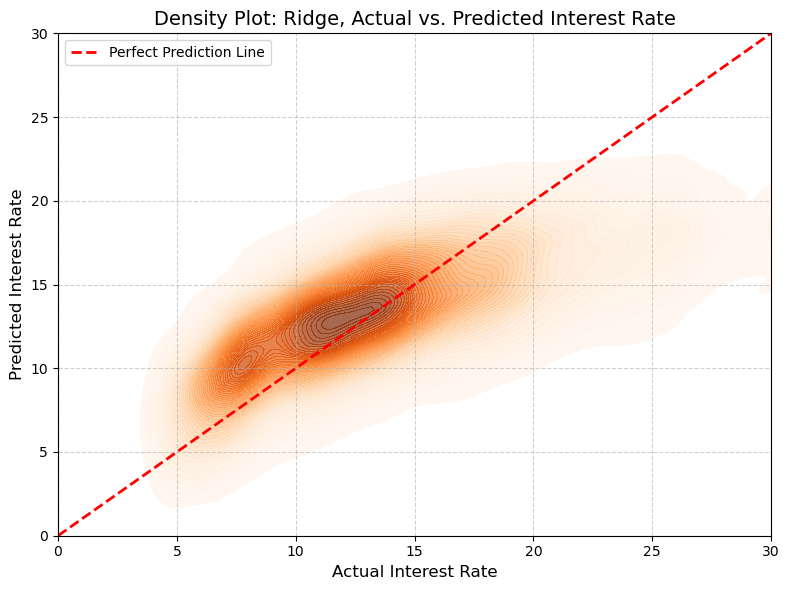

In [10]:
# Fit RidgeCV (cross-validation to select the best alpha)
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=10).fit(X_train_scaled, Y_train)

# Get the coefficients from the RidgeCV model
ridge_coefficients = ridge_cv.coef_

# Get the best alpha (lambda) from the RidgeCV model
best_alpha = ridge_cv.alpha_
print(f"Best alpha (lambda): {best_alpha}")

# Create a DataFrame to show the features and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_coefficients
})

# Add a column for the absolute values of coefficients (for significance sorting)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Filter to show only non-zero coefficients (significant features)
non_zero_coeff = coeff_df[coeff_df['Coefficient'] != 0]

# Sort by the absolute value of coefficients (ascending order)
sorted_coeff = non_zero_coeff.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted DataFrame
sorted_coeff = sorted_coeff[['Feature', 'Coefficient', 'Abs_Coefficient']]
# make the coefficients and abs_coefficient to numeric variables, round to 4 digits.
sorted_coeff['Coefficient'] = pd.to_numeric(sorted_coeff['Coefficient'])
sorted_coeff['Abs_Coefficient'] = pd.to_numeric(sorted_coeff['Abs_Coefficient'])
sorted_coeff = sorted_coeff.round(4)
sorted_coeff

# Calculate the accuracy of the model using X_test and Y_test
Y_pred = ridge_cv.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# create a empty list to store the RMSE of the model and append the accuracy of the model to the list, state the model as Ridge
model_rmse = []
model_rmse.append(rmse)
model_rmse = pd.DataFrame(model_rmse, columns=['RMSE'])
model_rmse['Model'] = 'Ridge'
print(model_rmse)


# Visualize the predicted interest rate and the actual interest rate
plt.figure(figsize=(8, 6))

# Create a density plot for Ridge regression
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Oranges", fill=True, thresh=0.01, levels=50, alpha=0.7)

# Add a perfect prediction line
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")

# Add labels and title
plt.xlabel("Actual Interest Rate", fontsize=12)
plt.ylabel("Predicted Interest Rate", fontsize=12)
plt.title("Density Plot: Ridge, Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)

# Limit the x and y axes
plt.xlim(0, 30)
plt.ylim(0, 30)

# Adjust ticks and grid for better clarity
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



## LASSO,No standardization

/Users/haoyuanlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9604.400830298662, tolerance: 3800.698004488686
  model = cd_fast.enet_coordinate_descent_gram(
/Users/haoyuanlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5634.12745013088, tolerance: 3800.698004488686
  model = cd_fast.enet_coordinate_descent_gram(
/Users/haoyuanlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5178.419172234833, tolerance: 3800.698004488686
  model = cd_fast.enet_coordinate_descent_gram(
/Users/haoyuanlin/anaconda3/lib/python3.11/site-packa

Best alpha (lambda): 27.812773730390578
Root Mean Squared Error: 4.2806419753136495


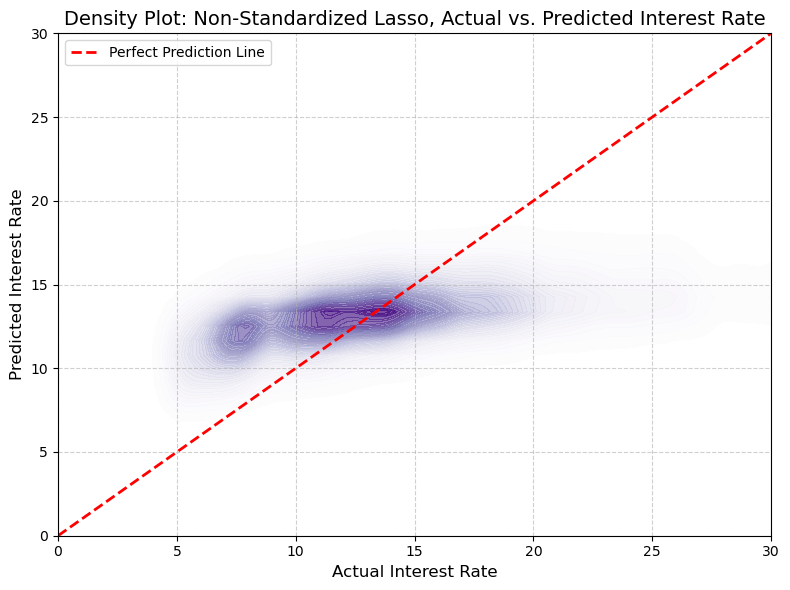

In [24]:
# Prepare the data
df4 = df3.copy()

# since installment is directly determined with int_rate, term, and funded_amnt, we decide to drop it.
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt','total_rec_int','total_rec_prncp',"loan_status_Current",'loan_status_Fully Paid','loan_status_In Grace Period',"loan_status_Late (16-30 days)",'loan_status_Late (31-120 days)','loan_status_Default','loan_status_Does not meet the credit policy. Status:Charged Off','loan_status_Does not meet the credit policy. Status:Fully Paid','total_pymnt_inv','total_pymnt'])
Y = df4['int_rate']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# No standardization applied here; use the raw features
X_train_raw = X_train.copy()
X_test_raw = X_test.copy()

# Fit LassoCV (without scaling)
lasso_cv = LassoCV(cv=10, random_state=0).fit(X_train_raw, Y_train)

# Get coefficients and best alpha
lasso_coefficients = lasso_cv.coef_
best_alpha = lasso_cv.alpha_

print(f"Best alpha (lambda): {best_alpha}")

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefficients
})

coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
non_zero_coeff = coeff_df[coeff_df['Coefficient'] != 0]
sorted_coeff = non_zero_coeff.sort_values(by='Abs_Coefficient', ascending=False)
sorted_coeff = sorted_coeff[['Feature', 'Coefficient', 'Abs_Coefficient']].round(4)

# Evaluate model
Y_pred = lasso_cv.predict(X_test_raw)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Append the RMSE of the LASSO without standardization model to the list `model_rmse`
new_entry = pd.DataFrame([{'Model': 'Lasso without standardization', 'RMSE': rmse}])
model_rmse = pd.concat([model_rmse, new_entry], ignore_index=True)

# Adjust the density plot to limit axes from 0 to 30

plt.figure(figsize=(8, 6))

# Density plot for non-standardized Lasso regression
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Purples", fill=True, thresh=0.01, levels=50, alpha=0.7)

# Add a perfect prediction line
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")

# Add labels and title
plt.xlabel("Actual Interest Rate", fontsize=12)
plt.ylabel("Predicted Interest Rate", fontsize=12)
plt.title("Density Plot: Non-Standardized Lasso, Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)

# Limit the x and y axes
plt.xlim(0, 30)
plt.ylim(0, 30)

# Adjust ticks and grid for better clarity
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



## LASSO, with Standardization

In [25]:
model_rmse

,RMSE,Model
0,3.521649,Ridge
1,4.280642,Lasso without standardization


Best alpha (lambda): 0.002008404141065449
Root Mean Squared Error: 3.514820703710862
       RMSE                          Model
0  3.521649                          Ridge
1  4.280642  Lasso without standardization
2  3.514821     Lasso with standardization


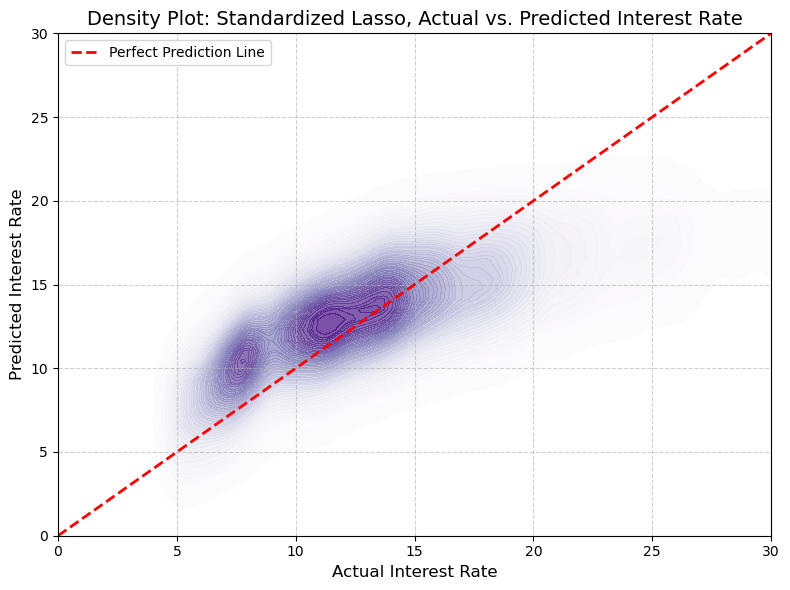

In [26]:


# Prepare the data
df4 = df3.copy()
# X: all columns except 'int_rate'
# since installment is directly determined with int_rate, term, and funded_amnt, we decide to drop it.
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt','total_rec_int','total_rec_prncp',"loan_status_Current",'loan_status_Fully Paid','loan_status_In Grace Period',"loan_status_Late (16-30 days)",'loan_status_Late (31-120 days)','loan_status_Default','loan_status_Does not meet the credit policy. Status:Charged Off','loan_status_Does not meet the credit policy. Status:Fully Paid','total_pymnt_inv','total_pymnt'])
Y = df4['int_rate']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit LassoCV (cross-validation to select the best alpha)
lasso_cv = LassoCV(cv=10, random_state=0).fit(X_train_scaled, Y_train)

# Get the coefficients from the LassoCV model
lasso_coefficients = lasso_cv.coef_

# Get the best alpha (lambda) from the LassoCV model
best_alpha = lasso_cv.alpha_


print(f"Best alpha (lambda): {best_alpha}")

# Create a DataFrame to show the features and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefficients
})

# Add a column for the absolute values of coefficients (for significance sorting)
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()

# Filter to show only non-zero coefficients (significant features)
non_zero_coeff = coeff_df[coeff_df['Coefficient'] != 0]

# Sort by the absolute value of coefficients (ascending order)
sorted_coeff = non_zero_coeff.sort_values(by='Abs_Coefficient', ascending=False)

# Display the sorted DataFrame
sorted_coeff = sorted_coeff[['Feature', 'Coefficient', 'Abs_Coefficient']]
# make the coefficients and abs_coefficient to numerix variables, round to 4 digits.
sorted_coeff['Coefficient'] = pd.to_numeric(sorted_coeff['Coefficient'])
sorted_coeff['Abs_Coefficient'] = pd.to_numeric(sorted_coeff['Abs_Coefficient'])
sorted_coeff = sorted_coeff.round(4)

# calculate the accuracy of the model using X_test and Y_test
Y_pred = lasso_cv.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Append the RMSE of the LASSO with standardization model to the list `model_rmse`
new_entry = pd.DataFrame([{'Model': 'Lasso with standardization', 'RMSE': rmse}])
model_rmse = pd.concat([model_rmse, new_entry], ignore_index=True)
print(model_rmse)

# Create a density plot for standardized Lasso regression

plt.figure(figsize=(8, 6))

# Density plot for non-standardized Lasso regression
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Purples", fill=True, thresh=0.01, levels=50, alpha=0.7)

# Add a perfect prediction line
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")

# Add labels and title
plt.xlabel("Actual Interest Rate", fontsize=12)
plt.ylabel("Predicted Interest Rate", fontsize=12)
plt.title("Density Plot: Standardized Lasso, Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xlim(0, 30)
plt.ylim(0, 30)
# Adjust ticks and grid for better clarity
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



Ridge have lower accuracy comparing to Lasso, and since lasso have the feature of model selection, we will use lasso.

In [32]:
# create a list for features that have a coefficient of 0
zero_coeff = coeff_df[coeff_df['Coefficient'] == 0]
zero_coeff = zero_coeff[['Feature', 'Coefficient', 'Abs_Coefficient']]
zero_coeff


,Feature,Coefficient,Abs_Coefficient
0,loan_amnt,0.0,0.0
1,funded_amnt,0.0,0.0
7,fico_range_high,-0.0,0.0
15,out_prncp_inv,-0.0,0.0
18,collection_recovery_fee,-0.0,0.0
22,policy_code,0.0,0.0
34,home_ownership_OTHER,0.0,0.0
36,home_ownership_RENT,0.0,0.0
59,addr_state_DE,-0.0,0.0
63,addr_state_IA,0.0,0.0


In [33]:
# create a separate dataframe for all features that have issue_d in part of the string, for exmaple, issue_d_Nov-2018.
issue_d = sorted_coeff[sorted_coeff['Feature'].str.contains('issue_d')]
print("---------------------------------------------------------------------")
print('issue_d')
print(issue_d)
print("---------------------------------------------------------------------")


---------------------------------------------------------------------
issue_d
               Feature  Coefficient  Abs_Coefficient
123  issue_d_year_2018       0.5723           0.5723
120  issue_d_year_2015      -0.4167           0.4167
122  issue_d_year_2017       0.2497           0.2497
116  issue_d_year_2011      -0.1754           0.1754
115  issue_d_year_2010      -0.1419           0.1419
102  issue_d_month_Aug       0.1088           0.1088
112  issue_d_month_Sep       0.1078           0.1078
106  issue_d_month_Jul       0.1061           0.1061
111  issue_d_month_Oct       0.0921           0.0921
103  issue_d_month_Dec       0.0871           0.0871
118  issue_d_year_2013       0.0856           0.0856
110  issue_d_month_Nov       0.0755           0.0755
113  issue_d_year_2008      -0.0474           0.0474
119  issue_d_year_2014      -0.0465           0.0465
117  issue_d_year_2012      -0.0457           0.0457
105  issue_d_month_Jan      -0.0450           0.0450
104  issue_d_month_Fe

In [34]:
issue_d_year

,Feature,Coefficient,Abs_Coefficient
123,issue_d_year_2018,0.5723,0.5723
120,issue_d_year_2015,-0.4167,0.4167
122,issue_d_year_2017,0.2497,0.2497
116,issue_d_year_2011,-0.1754,0.1754
115,issue_d_year_2010,-0.1419,0.1419
118,issue_d_year_2013,0.0856,0.0856
113,issue_d_year_2008,-0.0474,0.0474
119,issue_d_year_2014,-0.0465,0.0465
117,issue_d_year_2012,-0.0457,0.0457
114,issue_d_year_2009,-0.0153,0.0153


In [35]:
# create a separate dataframe for all years and another separate dataframe for all months
issue_d_year = sorted_coeff[sorted_coeff['Feature'].str.contains('issue_d_year')]
print("---------------------------------------------------------------------")
print('issue_d_year')
print(issue_d_year)
print("---------------------------------------------------------------------")

issue_d_month = sorted_coeff[sorted_coeff['Feature'].str.contains('issue_d_month')]
print("---------------------------------------------------------------------")
print('issue_d_month')
print(issue_d_month)
print("---------------------------------------------------------------------")




---------------------------------------------------------------------
issue_d_year
               Feature  Coefficient  Abs_Coefficient
123  issue_d_year_2018       0.5723           0.5723
120  issue_d_year_2015      -0.4167           0.4167
122  issue_d_year_2017       0.2497           0.2497
116  issue_d_year_2011      -0.1754           0.1754
115  issue_d_year_2010      -0.1419           0.1419
118  issue_d_year_2013       0.0856           0.0856
113  issue_d_year_2008      -0.0474           0.0474
119  issue_d_year_2014      -0.0465           0.0465
117  issue_d_year_2012      -0.0457           0.0457
114  issue_d_year_2009      -0.0153           0.0153
121  issue_d_year_2016       0.0006           0.0006
---------------------------------------------------------------------
---------------------------------------------------------------------
issue_d_month
               Feature  Coefficient  Abs_Coefficient
102  issue_d_month_Aug       0.1088           0.1088
112  issue_d_month_Se

In [36]:
# create a separate dataframe for all features that have earliest_cr_line in part of the string, for exmaple, earliest_cr_line_Nov-2018.
# make sure all 70 features are displayed
earliest_cr_line = sorted_coeff[sorted_coeff['Feature'].str.contains('earliest_cr_line')]
print("---------------------------------------------------------------------")
print('earliest_cr_line')
print(earliest_cr_line.head(50))
print(earliest_cr_line.tail(20))
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
earliest_cr_line
                        Feature  Coefficient  Abs_Coefficient
205  earliest_cr_line_year_2012       0.1012           0.1012
204  earliest_cr_line_year_2011       0.0965           0.0965
200  earliest_cr_line_year_2007       0.0930           0.0930
201  earliest_cr_line_year_2008       0.0903           0.0903
203  earliest_cr_line_year_2010       0.0854           0.0854
206  earliest_cr_line_year_2013       0.0814           0.0814
202  earliest_cr_line_year_2009       0.0800           0.0800
199  earliest_cr_line_year_2006       0.0795           0.0795
198  earliest_cr_line_year_2005       0.0720           0.0720
207  earliest_cr_line_year_2014       0.0649           0.0649
197  earliest_cr_line_year_2004       0.0559           0.0559
208  earliest_cr_line_year_2015       0.0536           0.0536
196  earliest_cr_line_year_2003       0.0353           0.0353
176  earliest_cr_line_year_1983      -0.0259 

In [37]:

# create a separate dataframe for all features that have last_credit_pull_d in part of the string, for exmaple, last_credit_pull_d_Nov-2018.
last_credit_pull_d = sorted_coeff[sorted_coeff['Feature'].str.contains('last_credit_pull_d')]
last_credit_pull_d
print("---------------------------------------------------------------------")
print('last_credit_pull_d')
print(last_credit_pull_d)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
last_credit_pull_d
                          Feature  Coefficient  Abs_Coefficient
231  last_credit_pull_d_year_2019      -0.1052           0.1052
227  last_credit_pull_d_year_2015       0.0350           0.0350
228  last_credit_pull_d_year_2016       0.0336           0.0336
229  last_credit_pull_d_year_2017       0.0318           0.0318
226  last_credit_pull_d_year_2014       0.0290           0.0290
225  last_credit_pull_d_year_2013       0.0212           0.0212
218  last_credit_pull_d_month_Oct      -0.0203           0.0203
211  last_credit_pull_d_month_Feb       0.0183           0.0183
215  last_credit_pull_d_month_Mar      -0.0173           0.0173
212  last_credit_pull_d_month_Jan       0.0148           0.0148
210  last_credit_pull_d_month_Dec      -0.0130           0.0130
217  last_credit_pull_d_month_Nov      -0.0127           0.0127
224  last_credit_pull_d_year_2012       0.0104           0.0104
216  last_credi

                        Feature  Coefficient  Abs_Coefficient  year
135  earliest_cr_line_year_1934       0.0010           0.0010  1934
139  earliest_cr_line_year_1946      -0.0003           0.0003  1946
141  earliest_cr_line_year_1948      -0.0003           0.0003  1948
144  earliest_cr_line_year_1951       0.0019           0.0019  1951
145  earliest_cr_line_year_1952       0.0043           0.0043  1952
..                          ...          ...              ...   ...
204  earliest_cr_line_year_2011       0.0965           0.0965  2011
205  earliest_cr_line_year_2012       0.1012           0.1012  2012
206  earliest_cr_line_year_2013       0.0814           0.0814  2013
207  earliest_cr_line_year_2014       0.0649           0.0649  2014
208  earliest_cr_line_year_2015       0.0536           0.0536  2015

[61 rows x 4 columns]
                        Feature  Coefficient  Abs_Coefficient month
127  earliest_cr_line_month_Jan      -0.0065           0.0065   Jan
126  earliest_cr_line_mon

/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_1514/3592665089.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earliest_cr_line_year['year'] = earliest_cr_line_year['Feature'].apply(lambda x: int(x.split('_')[-1]))
/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_1514/3592665089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earliest_cr_line_month['month'] = earliest_cr_line_month['Feature'].apply(lambda x: x.split('_')[-1])
/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ip

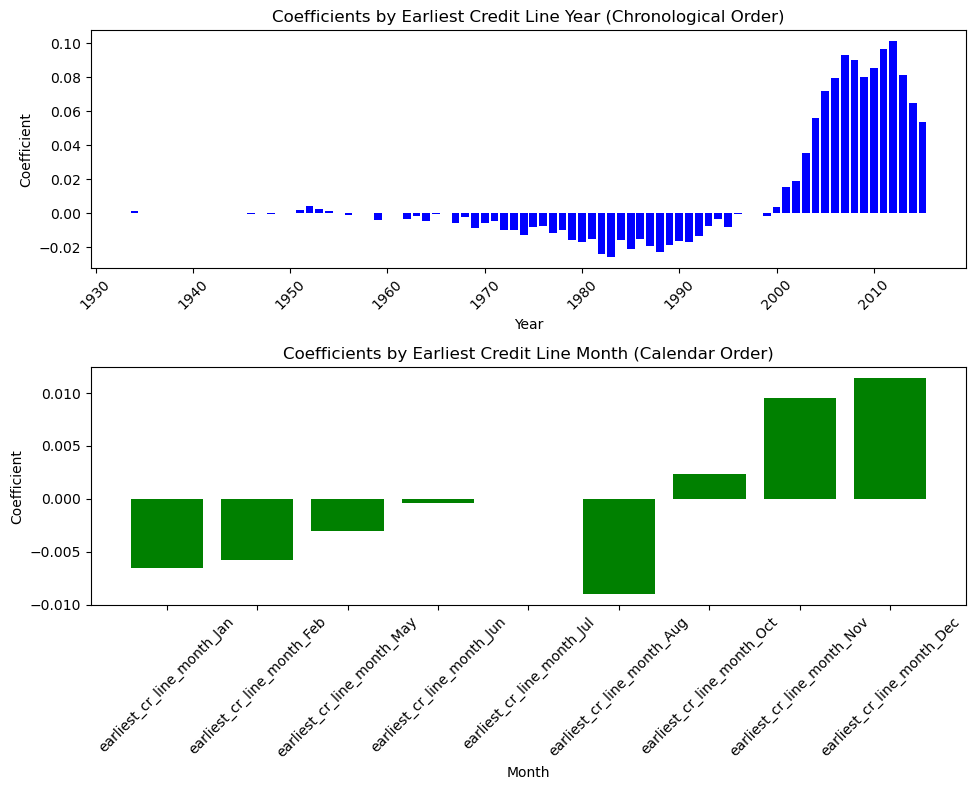

In [38]:
# Separate the data into year and month
earliest_cr_line_year = sorted_coeff[sorted_coeff['Feature'].str.contains('earliest_cr_line_year')]
earliest_cr_line_month = sorted_coeff[sorted_coeff['Feature'].str.contains('earliest_cr_line_month')]

# create columns for the year.
earliest_cr_line_year['year'] = earliest_cr_line_year['Feature'].apply(lambda x: int(x.split('_')[-1]))
earliest_cr_line_year = earliest_cr_line_year.sort_values(by='year')
print(earliest_cr_line_year)

# create columns for the month, make the month in ascending order, from Jan to Dec.
earliest_cr_line_month['month'] = earliest_cr_line_month['Feature'].apply(lambda x: x.split('_')[-1])
earliest_cr_line_month['month'] = pd.Categorical(earliest_cr_line_month['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
earliest_cr_line_month = earliest_cr_line_month.sort_values(by='month')
print(earliest_cr_line_month)

# visualize the data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Bar plot for year (chronological order)
ax1.bar(earliest_cr_line_year['year'], earliest_cr_line_year['Coefficient'], color='b')
ax1.set_title('Coefficients by Earliest Credit Line Year (Chronological Order)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Coefficient')
ax1.tick_params(axis='x', rotation=45)


# Bar plot for month (already in calendar order)
ax2.bar(earliest_cr_line_month['Feature'], earliest_cr_line_month['Coefficient'], color='g')
ax2.set_title('Coefficients by Earliest Credit Line Month (Calendar Order)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Coefficient')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the updated plots
plt.show()



In [39]:
# create a separate dataframe for all features that have addr_state in part of the string, for exmaple, addr_state_Nov-2018.

addr_state = sorted_coeff[sorted_coeff['Feature'].str.contains('addr_state')]
addr_state['addr_state'] = addr_state['Feature'].str[-2:]
addr_state

# merge the addr_state with the value_counts of addr_state
addr_state = pd.merge(addr_state, pd.DataFrame(df2['addr_state'].value_counts()), left_on='addr_state', right_index=True)
addr_state = addr_state.drop(columns=['Abs_Coefficient'])
addr_state

/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_1514/385385692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  addr_state['addr_state'] = addr_state['Feature'].str[-2:]


,addr_state,Feature,Coefficient,addr_state_x,addr_state_y
55,CA,addr_state_CA,-0.0507,CA,314519
70,MA,addr_state_MA,-0.0371,MA,51762
52,AL,addr_state_AL,0.0329,AL,27283
82,NJ,addr_state_NJ,-0.0302,NJ,83121
85,NY,addr_state_NY,0.0255,NY,186360
56,CO,addr_state_CO,-0.0234,CO,48177
54,AZ,addr_state_AZ,-0.0234,AZ,53774
93,TN,addr_state_TN,0.0221,TN,35481
91,SC,addr_state_SC,0.0201,SC,28002
76,MS,addr_state_MS,0.0171,MS,12637


In [40]:
# create a separate dataframe for all features that have purpose in part of the string, for exmaple, purpose_credit_card
purpose = sorted_coeff[sorted_coeff['Feature'].str.contains('purpose')]
purpose


,Feature,Coefficient,Abs_Coefficient
39,purpose_credit_card,-0.4838,0.4838
47,purpose_other,0.2876,0.2876
49,purpose_small_business,0.1878,0.1878
46,purpose_moving,0.1123,0.1123
45,purpose_medical,0.0944,0.0944
50,purpose_vacation,0.0736,0.0736
43,purpose_house,0.0727,0.0727
48,purpose_renewable_energy,0.0364,0.0364
51,purpose_wedding,0.0337,0.0337
40,purpose_debt_consolidation,0.0157,0.0157


In [41]:
# create a dataframe for all features excluding the state, issue_d, earliest_cr_line, last_credit_pull_d    
other = sorted_coeff[~sorted_coeff['Feature'].str.contains('addr_state')]
other = other[~other['Feature'].str.contains('issue_d')]
other = other[~other['Feature'].str.contains('earliest_cr_line')]
other = other[~other['Feature'].str.contains('last_credit_pull_d')]
other = other[~other['Feature'].str.contains('purpose')]
other

,Feature,Coefficient,Abs_Coefficient
31,term_60,1.9017,1.9017
6,fico_range_low,-1.6719,1.6719
19,last_fico_range_high,-0.7252,0.7252
38,verification_status_Verified,0.6361,0.6361
8,inq_last_6mths,0.6246,0.6246
13,initial_list_status,-0.6210,0.6210
29,disbursement_method,0.5368,0.5368
12,total_acc,-0.3511,0.3511
14,out_prncp,-0.3347,0.3347
2,funded_amnt_inv,0.2887,0.2887


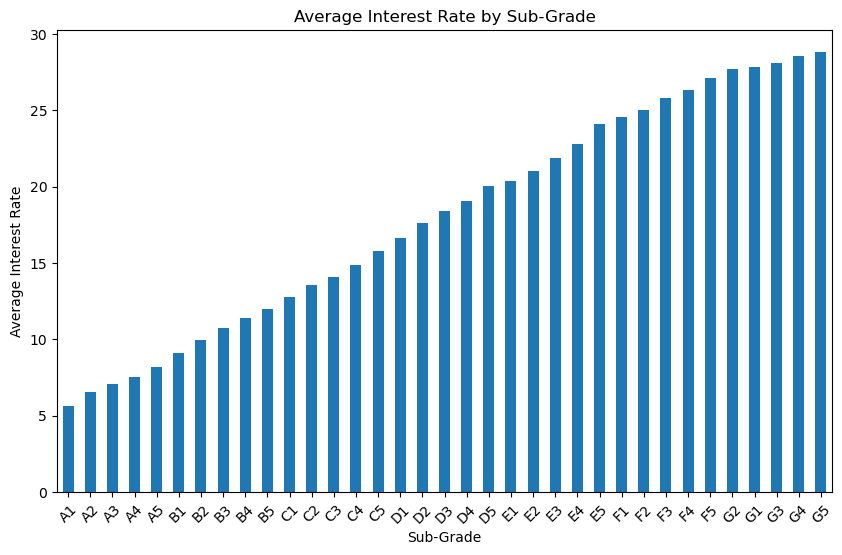

In [25]:
df2.groupby('sub_grade')['int_rate'].mean().sort_values(ascending=True)

# visualize the data for sub_grade and int_rate
plt.figure(figsize=(10, 6))
df2.groupby('sub_grade')['int_rate'].mean().sort_values(ascending=True).plot(kind='bar')
plt.title('Average Interest Rate by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)
plt.show()


In [42]:
df2['total_pymnt'] = df2['total_pymnt'].astype(float)

In [43]:
# round the total_pymnt to 1 decimal places
df2['total_pymnt'] = df2['total_pymnt'].round(1)

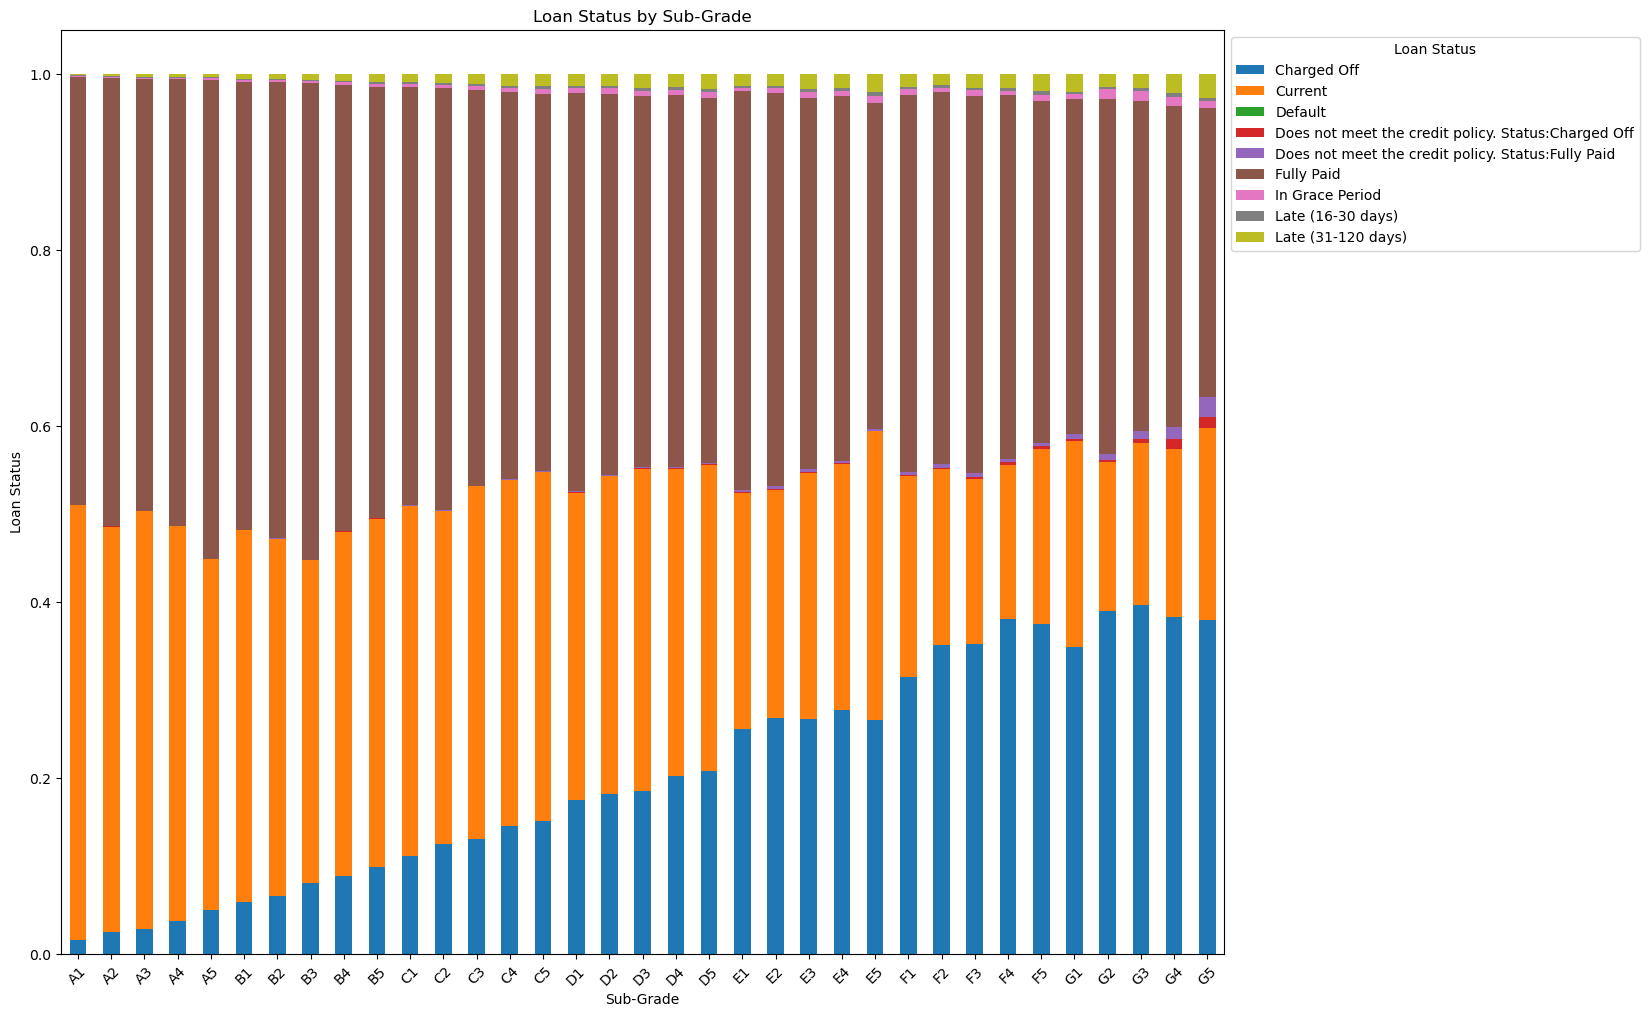

In [44]:
# Create a contingency table to show the frequency of loan_status for each sub_grade
status_frequency = pd.crosstab(df2['sub_grade'], df2['loan_status'])

# Display the frequency table
status_frequency

# visualize the data, how many percenate of each sub_grade is fully paid, charged off, etc.
status_frequency.div(status_frequency.sum(axis=1), axis=0).plot(kind='bar', stacked=True, figsize=(15, 12))
plt.title('Loan Status by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Loan Status')
plt.xticks(rotation=45)
# legend on the right side
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))
plt.show()


In [30]:
df5 = df2.copy()
df5['funded_amnt_indu'] = df5['funded_amnt']-df5['funded_amnt_inv']
df5

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year,funded_amnt_indu
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,0,debt_consolidation,PA,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,13.0,1,0.00,0.00,4421.7,4421.72,3600.00,821.72,0.00,0.0,0.0,122.67,564.0,560.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2003,Mar,2019,0.0
68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,0,small_business,SD,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,38.0,1,0.00,0.00,25679.7,25679.66,24700.00,979.66,0.00,0.0,0.0,926.35,699.0,695.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Dec,1999,Mar,2019,0.0
68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,0,home_improvement,IL,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,18.0,1,0.00,0.00,22705.9,22705.92,20000.00,2705.92,0.00,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2000,Mar,2019,0.0
66310712,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,MORTGAGE,110000.0,Source Verified,Current,0,debt_consolidation,NJ,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,17.0,1,15897.65,15897.65,31464.0,31464.01,19102.35,12361.66,0.00,0.0,0.0,829.90,679.0,675.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Sep,2008,Mar,2019,0.0
68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,0,major_purchase,PA,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,35.0,1,0.00,0.00,11740.5,11740.50,10400.00,1340.50,0.00,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Jun,1998,Mar,2018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89885898,24000.0,24000.0,24000.0,60,12.79,543.50,C,C1,MORTGAGE,95000.0,Source Verified,Current,0,home_improvement,AL,0.0,665.0,669.0,0.0,5.0,0.0,49431.0,54.0,0,14287.39,14287.39,15760.5,15760.50,9712.61,6047.89,0.00,0.0,0.0,543.50,709.0,705.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Dec,1999,Mar,2019,0.0
88977788,24000.0,24000.0,24000.0,60,10.49,515.74,B,B3,MORTGAGE,108000.0,Not Verified,Current,0,debt_consolidation,UT,0.0,695.0,699.0,1.0,24.0,1.0,21665.0,58.0,0,13951.42,13951.42,15008.5,15008.53,10048.58,4959.95,0.00,0.0,0.0,515.74,734.0,730.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0,1,0,Oct,2016,Feb,1991,Mar,2019,0.0
88985880,40000.0,40000.0,40000.0,60,10.49,859.56,B,B3,MORTGAGE,227000.0,Verified,Current,0,debt_consolidation,CA,7.0,705.0,709.0,1.0,5.0,0.0,8633.0,37.0,0,23252.59,23252.59,24903.9,24903.93,16747.41,8156.52,0.00,0.0,0.0,859.56,724.0,720.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Feb,1995,Mar,2019,0.0


In [31]:
# calculate the percentage of individual funded loans for each sub_grade, df5['funded_amnt_inv']/df5['funded_amnt']
df5.groupby('sub_grade')['funded_amnt_inv'].sum()/df5.groupby('sub_grade')['funded_amnt'].sum()

sub_grade
A1    0.999719
A2    0.999570
A3    0.999196
A4    0.999148
A5    0.999034
B1    0.998899
B2    0.998670
B3    0.998570
B4    0.998722
B5    0.998701
C1    0.998953
C2    0.998957
C3    0.999003
C4    0.999168
C5    0.999090
D1    0.998753
D2    0.998753
D3    0.998705
D4    0.998597
D5    0.998713
E1    0.998202
E2    0.997798
E3    0.997956
E4    0.997837
E5    0.998359
F1    0.997466
F2    0.996960
F3    0.997102
F4    0.997191
F5    0.996962
G1    0.996785
G2    0.996840
G3    0.996368
G4    0.990779
G5    0.993042
dtype: float64

we realized 99%+ investor funded seems abnormal, so we took investigation into the screening procedure and found loan application are random assigned to institutional and retail pool. there are passive institutional and active institutional, passive institution will securitized the loan after originated, while active institutions will simply invest to diversified their risk. This mean the loan that funded by institutions are identical to loan funded by retailers.

Balyuk, Tetyana and Davydenko, Sergei, Reintermediation in FinTech: Evidence from Online Lending (January 20, 2023). Michael J. Brennan Irish Finance Working Paper Series Research Paper No. 18-17, 31st Australasian Finance and Banking Conference 2018, Available at SSRN: https://ssrn.com/abstract=3189236 or http://dx.doi.org/10.2139/ssrn.3189236

additional info, in 2023 alone, prosper facilitated 2.2 billion.

Our marketplace facilitated $2.2 billion in Borrower Loan originations across all programs during the year ended December 31, 2023

https://p2pmarketdata.com/articles/p2p-lending-history/

around 50% of the P2P lending are invested by institutions. to make eveything simple, half of the loan are random assigned to institutions and half random assigned to retailers.a

Test RMSE: 3.8319441684143905
Test R-Squared: 0.37228323541637487
Train RMSE: 3.8265645531600803
       RMSE                                              Model
0  3.521649                                              Ridge
1  3.521649  Random Forest with 100 n estimators and 5 max_...


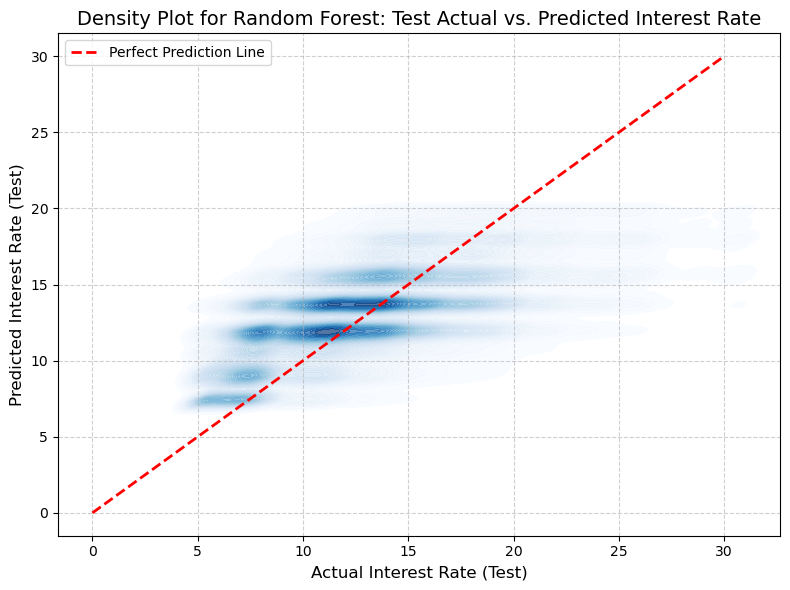

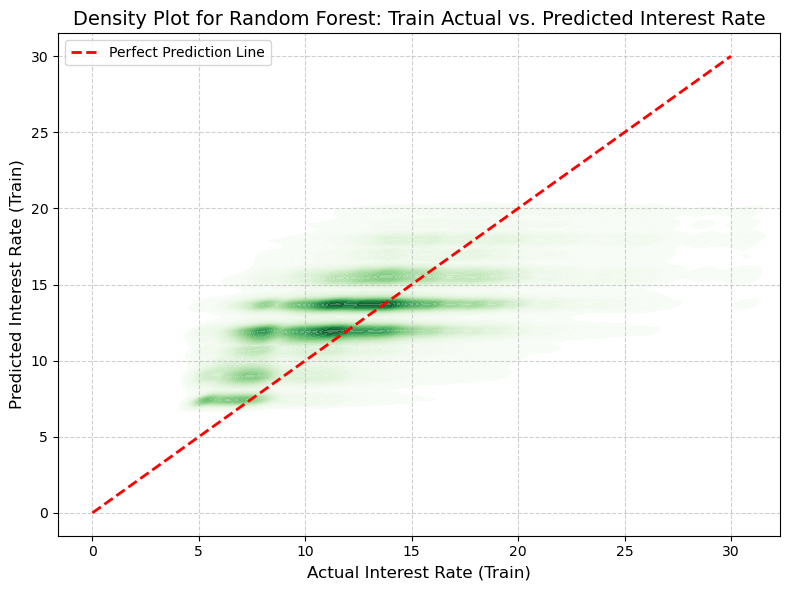

                          Feature  Importance
31                        term_60    0.378631
6                  fico_range_low    0.199369
7                 fico_range_high    0.199247
19           last_fico_range_high    0.059016
20            last_fico_range_low    0.057508
13            initial_list_status    0.036455
39            purpose_credit_card    0.023718
38   verification_status_Verified    0.016902
29            disbursement_method    0.016722
3                      annual_inc    0.008456
120             issue_d_year_2015    0.002301
11                      revol_bal    0.000669
8                  inq_last_6mths    0.000633
121             issue_d_year_2016    0.000204
12                      total_acc    0.000152
17                     recoveries    0.000017
160    earliest_cr_line_year_1967    0.000000
159    earliest_cr_line_year_1966    0.000000
158    earliest_cr_line_year_1965    0.000000
0                       loan_amnt    0.000000
157    earliest_cr_line_year_1964 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
df4 = df3.copy()

# Drop irrelevant columns
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_prncp',
                      "loan_status_Current", 'loan_status_Fully Paid', 'loan_status_In Grace Period',
                      "loan_status_Late (16-30 days)", 'loan_status_Late (31-120 days)', 'loan_status_Default',
                      'loan_status_Does not meet the credit policy. Status:Charged Off',
                      'loan_status_Does not meet the credit policy. Status:Fully Paid',
                      'total_pymnt_inv', 'total_pymnt'])
Y = df4['int_rate']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,    
    max_depth=5,        
    random_state=42,     
    n_jobs=-1            
)

rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test)
Y_train_pred = rf_model.predict(X_train)

# Evaluate the model
test_mse = mean_squared_error(Y_test, Y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"Test RMSE: {test_rmse}")
print(f"Test R-Squared: {test_r2}")
print(f"Train RMSE: {train_rmse}")


# Append the RMSE of the random forest with standardization model to the list `model_rmse`
new_entry = pd.DataFrame([{'Model': 'Random Forest with 100 n estimators and 5 max_depth', 'RMSE': test_rmse}])
model_rmse = pd.concat([model_rmse, new_entry], ignore_index=True)
print(model_rmse)

# Improved density plot for Test data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Blues", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Test)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Test)", fontsize=12)
plt.title("Density Plot for Random Forest: Test Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Improved density plot for Train data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_train, y=Y_train_pred, cmap="Greens", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Train)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Train)", fontsize=12)
plt.title("Density Plot for Random Forest: Train Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Get feature importance scores
importance = rf_model.feature_importances_

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(50))


Test RMSE: 3.5574313122358863
Test R-Squared: 0.4589985503501922
Train RMSE: 3.535919191284998
       RMSE                                              Model
0  3.521649                                              Ridge
1  3.521649  Random Forest with 100 n estimators and 5 max_...
2  3.521649  Random Forest with 100 n estimators and 10 max...


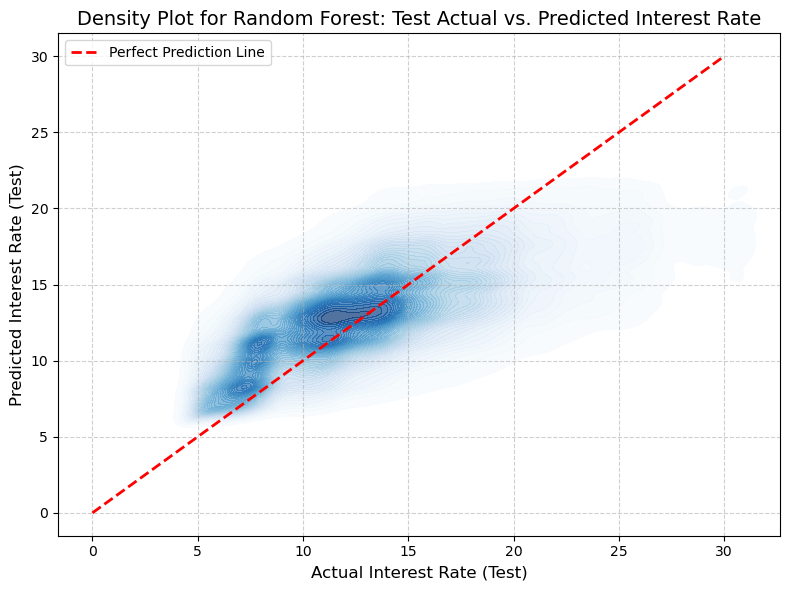

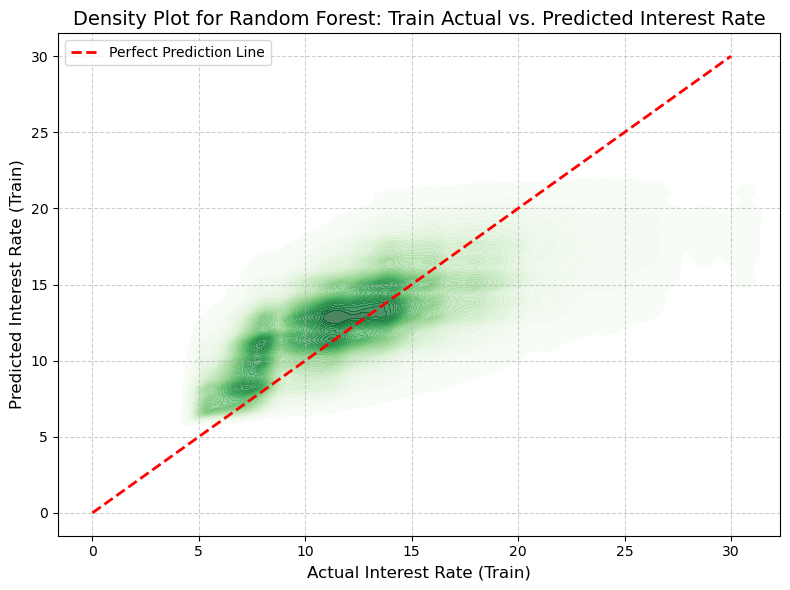

                                 Feature  Importance
31                               term_60    0.307867
6                         fico_range_low    0.179989
7                        fico_range_high    0.172704
19                  last_fico_range_high    0.050999
20                   last_fico_range_low    0.048308
13                   initial_list_status    0.036579
39                   purpose_credit_card    0.033738
38          verification_status_Verified    0.032172
3                             annual_inc    0.028225
8                         inq_last_6mths    0.023192
29                   disbursement_method    0.021770
120                    issue_d_year_2015    0.021381
123                    issue_d_year_2018    0.009352
121                    issue_d_year_2016    0.004591
11                             revol_bal    0.003602
37   verification_status_Source Verified    0.003182
122                    issue_d_year_2017    0.002755
12                             total_acc    0.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
df4 = df3.copy()

# Drop irrelevant columns
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_prncp',
                      "loan_status_Current", 'loan_status_Fully Paid', 'loan_status_In Grace Period',
                      "loan_status_Late (16-30 days)", 'loan_status_Late (31-120 days)', 'loan_status_Default',
                      'loan_status_Does not meet the credit policy. Status:Charged Off',
                      'loan_status_Does not meet the credit policy. Status:Fully Paid',
                      'total_pymnt_inv', 'total_pymnt'])
Y = df4['int_rate']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,    
    max_depth=10,        
    random_state=42,     
    n_jobs=-1            
)

rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test)
Y_train_pred = rf_model.predict(X_train)

# Evaluate the model
test_mse = mean_squared_error(Y_test, Y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"Test RMSE: {test_rmse}")
print(f"Test R-Squared: {test_r2}")
print(f"Train RMSE: {train_rmse}")


# Append the RMSE of the random forest with standardization model to the list `model_rmse`
new_entry = pd.DataFrame([{'Model': 'Random Forest with 100 n estimators and 10 max_depth', 'RMSE': test_rmse}])
model_rmse = pd.concat([model_rmse, new_entry], ignore_index=True)
print(model_rmse)

# Improved density plot for Test data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Blues", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Test)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Test)", fontsize=12)
plt.title("Density Plot for Random Forest: Test Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Improved density plot for Train data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_train, y=Y_train_pred, cmap="Greens", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Train)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Train)", fontsize=12)
plt.title("Density Plot for Random Forest: Train Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Get feature importance scores
importance = rf_model.feature_importances_

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(50))


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
df4 = df3.copy()

# Drop irrelevant columns
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_prncp',
                      "loan_status_Current", 'loan_status_Fully Paid', 'loan_status_In Grace Period',
                      "loan_status_Late (16-30 days)", 'loan_status_Late (31-120 days)', 'loan_status_Default',
                      'loan_status_Does not meet the credit policy. Status:Charged Off',
                      'loan_status_Does not meet the credit policy. Status:Fully Paid',
                      'total_pymnt_inv', 'total_pymnt'])
Y = df4['int_rate']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=500,    
    max_depth=10,        
    random_state=42,     
    n_jobs=-1            
)

rf_model.fit(X_train, Y_train)

# Make predictions
Y_pred = rf_model.predict(X_test)
Y_train_pred = rf_model.predict(X_train)

# Evaluate the model
test_mse = mean_squared_error(Y_test, Y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"Test RMSE: {test_rmse}")
print(f"Test R-Squared: {test_r2}")
print(f"Train RMSE: {train_rmse}")


# Append the RMSE of the random forest with standardization model to the list `model_rmse`
new_entry = pd.DataFrame([{'Model': 'Random Forest with 100 n estimators and 10 max_depth', 'RMSE': test_rmse}])
model_rmse = pd.concat([model_rmse, new_entry], ignore_index=True)
print(model_rmse)

# Improved density plot for Test data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Blues", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Test)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Test)", fontsize=12)
plt.title("Density Plot for Random Forest: Test Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Improved density plot for Train data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_train, y=Y_train_pred, cmap="Greens", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Train)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Train)", fontsize=12)
plt.title("Density Plot for Random Forest: Train Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Get feature importance scores
importance = rf_model.feature_importances_

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(50))


Test RMSE: 3.5570943294956314
Test R-Squared: 0.45910103975914196
Train RMSE: 3.5356546269563074


NameError: name 'model_rmse' is not defined

# gradient boosting

Test RMSE: 2.797183248973623
Test R-Squared: 0.6655222603443427
Train RMSE: 2.34894480239615


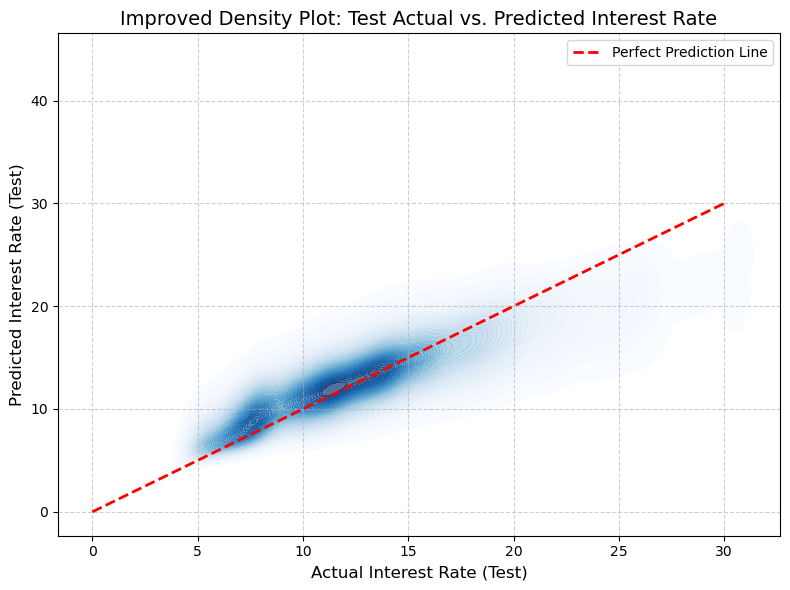

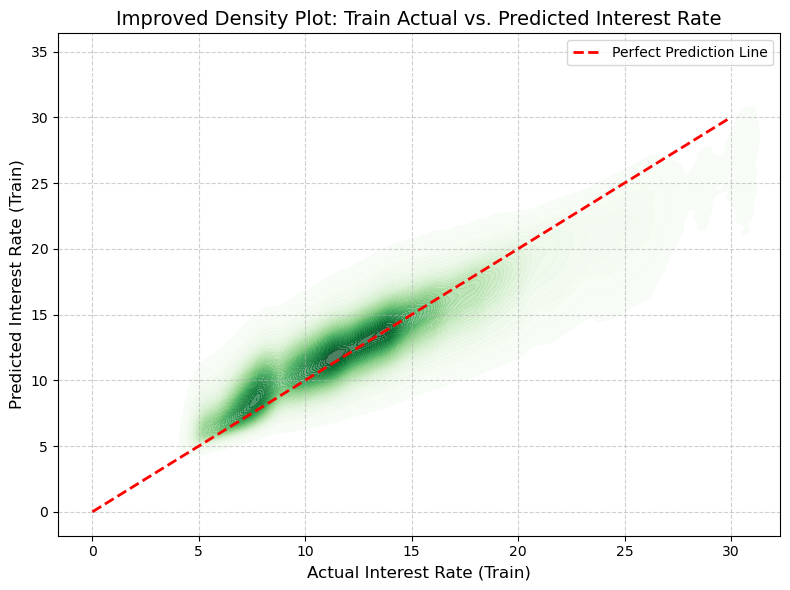

,Feature,Importance
0,loan_amnt,303700.0
3,annual_inc,283807.0
11,revol_bal,226938.0
6,fico_range_low,203955.0
19,last_fico_range_high,193530.0
14,out_prncp,169947.0
12,total_acc,164510.0
9,open_acc,151844.0
15,out_prncp_inv,91355.0
2,funded_amnt_inv,90801.0


In [10]:

# Step 1: Prepare the data
df4 = df3.copy()

# Drop irrelevant columns
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt','total_rec_int','total_rec_prncp',
                      "loan_status_Current", 'loan_status_Fully Paid', 'loan_status_In Grace Period',
                      "loan_status_Late (16-30 days)", 'loan_status_Late (31-120 days)', 'loan_status_Default',
                      'loan_status_Does not meet the credit policy. Status:Charged Off',
                      'loan_status_Does not meet the credit policy. Status:Fully Paid',
                      'total_pymnt_inv', 'total_pymnt'])
Y = df4['int_rate']

# Step 2: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=5000,       
    max_depth=10,            
    learning_rate=0.02,      
    subsample=0.8,          
    colsample_bytree=0.8,   
    random_state=42,
    n_jobs=-1               
)

xgb_model.fit(X_train, Y_train)

# Step 4: Make predictions
Y_pred = xgb_model.predict(X_test)
Y_train_pred = xgb_model.predict(X_train)

# Step 5: Evaluate the model
test_mse = mean_squared_error(Y_test, Y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"Test RMSE: {test_rmse}")
print(f"Test R-Squared: {test_r2}")
print(f"Train RMSE: {train_rmse}")



# Improved density plot for Test data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Blues", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Test)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Test)", fontsize=12)
plt.title("Improved Density Plot: Test Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Improved density plot for Train data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_train, y=Y_train_pred, cmap="Greens", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 30], [0, 30], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Train)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Train)", fontsize=12)
plt.title("Improved Density Plot: Train Actual vs. Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




# Get feature importance scores
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
}).sort_values(by='Importance', ascending=False)

importance_df.head(50)


Neural Network


/Users/haoyuanlin/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 43s 751us/step - loss: 13.5040 - mae: 2.7405 - val_loss: 11.7674 - val_mae: 2.5175
Epoch 2/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 40s 709us/step - loss: 12.7131 - mae: 2.5323 - val_loss: 11.6036 - val_mae: 2.4843
Epoch 3/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 41s 724us/step - loss: 11.6092 - mae: 2.5046 - val_loss: 11.0075 - val_mae: 2.4540
Epoch 4/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 40s 706us/step - loss: 10.9151 - mae: 2.4866 - val_loss: 10.8542 - val_mae: 2.4607
Epoch 5/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 40s 709us/step - loss: 10.6846 - mae: 2.4615 - val_loss: 10.7808 - val_mae: 2.4351
Epoch 6/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 41s 728us/step - loss: 11.1319 - mae: 2.4353 - val_loss: 10.1237 - val_mae: 2.4197
Epoch 7/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 39s 686us/step - loss: 10.6649 - mae: 2.4205 - val_loss: 10.0085 - val_mae: 2.3952
Epoch 8/30
56512/56512 ━━━━━━━━━━━━━━━━━━━━ 36s 635us/step - loss: 10.1981 - mae: 2.4044 - val_loss: 9.9147 - v

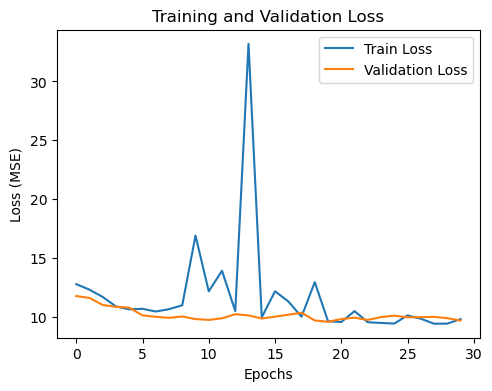

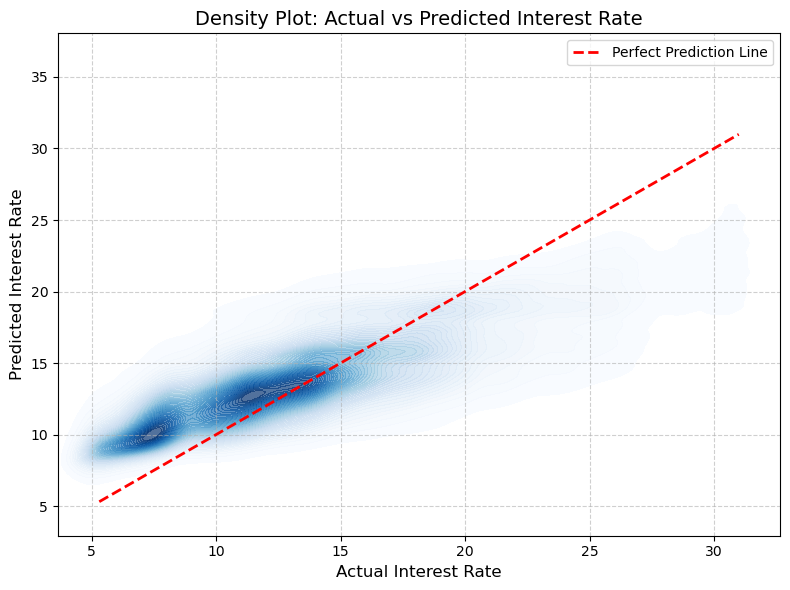

In [33]:


# Step 1: Prepare the data
df4 = df3.copy()

# Drop irrelevant columns
X = df4.drop(columns=['int_rate', 'installment', 'last_pymnt_amnt', 'total_rec_int', 'total_rec_prncp',
                      "loan_status_Current", 'loan_status_Fully Paid', 'loan_status_In Grace Period',
                      "loan_status_Late (16-30 days)", 'loan_status_Late (31-120 days)', 'loan_status_Default',
                      'loan_status_Does not meet the credit policy. Status:Charged Off',
                      'loan_status_Does not meet the credit policy. Status:Fully Paid',
                      'total_pymnt_inv', 'total_pymnt'])
Y = df4['int_rate']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Build the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1)  # Output layer (single value for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 3: Train the Neural Network
history = model.fit(
    X_train_scaled, Y_train,
    validation_data=(X_test_scaled, Y_test),
    epochs=30,  # Number of iterations over the entire dataset
    batch_size=32,  # Number of samples per batch
    verbose=1
)

# Step 4: Evaluate the Model
Y_pred = model.predict(X_test_scaled).flatten()

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")

# Step 5: Visualize Training History
plt.figure(figsize=(12, 4))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("Training and Validation Loss")

# Plot actual vs predicted
# Create a density plot to replace the scatter plot

plt.figure(figsize=(8, 6))

# Density plot for Actual vs Predicted Interest Rate
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Blues", fill=True, thresh=0.01, levels=50, alpha=0.7)

# Add a perfect prediction line
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")

# Add labels and title
plt.xlabel("Actual Interest Rate", fontsize=12)
plt.ylabel("Predicted Interest Rate", fontsize=12)
plt.title("Density Plot: Actual vs Predicted Interest Rate", fontsize=14)
plt.legend(fontsize=10)

# Adjust ticks and grid for better clarity
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



In [13]:
df2

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,0,debt_consolidation,PA,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,13.0,1,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.00,0.0,0.0,122.67,564.0,560.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2003,Mar,2019
68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,0,small_business,SD,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,38.0,1,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.00,0.0,0.0,926.35,699.0,695.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Dec,1999,Mar,2019
68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,0,home_improvement,IL,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,18.0,1,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.00,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2000,Mar,2019
66310712,35000.0,35000.0,35000.0,60,14.85,829.90,C,C5,MORTGAGE,110000.0,Source Verified,Current,0,debt_consolidation,NJ,0.0,785.0,789.0,0.0,13.0,0.0,7802.0,17.0,1,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.00,0.0,0.0,829.90,679.0,675.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Sep,2008,Mar,2019
68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,0,major_purchase,PA,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,35.0,1,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.00,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Jun,1998,Mar,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89885898,24000.0,24000.0,24000.0,60,12.79,543.50,C,C1,MORTGAGE,95000.0,Source Verified,Current,0,home_improvement,AL,0.0,665.0,669.0,0.0,5.0,0.0,49431.0,54.0,0,14287.39,14287.39,15760.500000,15760.50,9712.61,6047.89,0.00,0.0,0.0,543.50,709.0,705.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Dec,1999,Mar,2019
88977788,24000.0,24000.0,24000.0,60,10.49,515.74,B,B3,MORTGAGE,108000.0,Not Verified,Current,0,debt_consolidation,UT,0.0,695.0,699.0,1.0,24.0,1.0,21665.0,58.0,0,13951.42,13951.42,15008.530000,15008.53,10048.58,4959.95,0.00,0.0,0.0,515.74,734.0,730.0,0.0,1.0,1,0.0,0.0,0.0,1.0,0,1,0,Oct,2016,Feb,1991,Mar,2019
88985880,40000.0,40000.0,40000.0,60,10.49,859.56,B,B3,MORTGAGE,227000.0,Verified,Current,0,debt_consolidation,CA,7.0,705.0,709.0,1.0,5.0,0.0,8633.0,37.0,0,23252.59,23252.59,24903.930000,24903.93,16747.41,8156.52,0.00,0.0,0.0,859.56,724.0,720.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Feb,1995,Mar,2019


In [14]:
pd.set_option('display.max_rows', None)

# First DataFrame: Proportion of counts
df_counts = pd.DataFrame(
    df2.groupby(['grade', 'loan_status'])['total_pymnt'].count() / 
    df2.groupby(['grade'])['funded_amnt'].count()
).reset_index()
df_counts.columns = ['grade', 'loan_status', 'proportion_count']

# Second DataFrame: Sum ratios
total_paymentover_funded_amnt = pd.DataFrame(
    df2.groupby(['grade', 'loan_status'])['total_pymnt'].sum() / 
    df2.groupby(['grade', 'loan_status'])['funded_amnt'].sum()
).reset_index()
total_paymentover_funded_amnt.columns = ['grade', 'loan_status', 'total_paymentover_funded_amnt']

# Merge the two DataFrames on 'grade' and 'loan_status'
combined_df = pd.merge(df_counts, total_paymentover_funded_amnt, on=['grade', 'loan_status'])

# Display the combined DataFrame
combined_df


/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_6734/1925299125.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby(['grade', 'loan_status'])['total_pymnt'].count() /
/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_6734/1925299125.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2.groupby(['grade'])['funded_amnt'].count()
/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_6734/1925299125.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

,grade,loan_status,proportion_count,total_paymentover_funded_amnt
0,A,Charged Off,0.032799,0.544687
1,A,Current,0.451607,0.404252
2,A,Default,0.000012,0.489964
3,A,Does not meet the credit policy. Status:Charge...,0.000016,0.697407
4,A,Does not meet the credit policy. Status:Fully ...,0.000178,1.113958
5,A,Fully Paid,0.510088,1.086338
6,A,In Grace Period,0.001460,0.478730
7,A,Late (16-30 days),0.000788,0.492884
8,A,Late (31-120 days),0.003053,0.461090
9,B,Charged Off,0.079221,0.541901


/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_9230/3217177079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['actual_return'] = df8['total_pymnt']/df8['funded_amnt']


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year,actual_return
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,3600.0,3600.0,36,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,Fully Paid,0,debt_consolidation,PA,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,13.0,1,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,122.67,564.0,560.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2003,Mar,2019,1.228257
68355089,24700.0,24700.0,24700.0,36,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,Fully Paid,0,small_business,SD,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,38.0,1,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,926.35,699.0,695.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Dec,1999,Mar,2019,1.039662
68341763,20000.0,20000.0,20000.0,60,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,Fully Paid,0,home_improvement,IL,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,18.0,1,0.0,0.0,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,15813.30,704.0,700.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2000,Mar,2019,1.135296
68476807,10400.0,10400.0,10400.0,60,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,Fully Paid,0,major_purchase,PA,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,35.0,1,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,10128.96,704.0,700.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Jun,1998,Mar,2018,1.128894
68426831,11950.0,11950.0,11950.0,36,13.44,405.18,C,C3,RENT,34000.0,Source Verified,Fully Paid,0,debt_consolidation,GA,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,6.0,1,0.0,0.0,13708.948530,13708.95,11950.00,1758.95,0.0,0.0,0.0,7653.56,759.0,755.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Oct,1987,May,2017,1.147192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89905081,18000.0,18000.0,18000.0,60,9.49,377.95,B,B2,OWN,130000.0,Not Verified,Fully Paid,0,home_improvement,TX,0.0,735.0,739.0,1.0,17.0,0.0,23833.0,39.0,0,0.0,0.0,20756.233632,20756.23,18000.00,2756.23,0.0,0.0,0.0,12828.77,709.0,705.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Jul,2004,Mar,2019,1.153124
88948836,29400.0,29400.0,29400.0,60,13.99,683.94,C,C3,MORTGAGE,180792.0,Not Verified,Fully Paid,0,debt_consolidation,CA,0.0,705.0,709.0,1.0,16.0,0.0,77480.0,32.0,0,0.0,0.0,35848.764532,35848.76,29400.00,6448.76,0.0,0.0,0.0,22192.81,719.0,715.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Mar,2002,Jul,2018,1.219346
89996426,32000.0,32000.0,32000.0,60,14.49,752.74,C,C4,MORTGAGE,157000.0,Source Verified,Charged Off,0,home_improvement,AZ,0.0,735.0,739.0,0.0,14.0,0.0,111598.0,18.0,0,0.0,0.0,3737.940000,3737.94,1876.47,1861.47,0.0,0.0,0.0,752.74,499.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Jun,2011,Dec,2018,0.116811


In [ ]:
# First DataFrame: Proportion of counts
df_counts = pd.DataFrame(
    df8.groupby(['grade', 'loan_status'])['total_pymnt'].count() / 
    df8.groupby(['grade'])['funded_amnt'].count()
).reset_index()
df_counts.columns = ['grade', 'loan_status', 'proportion_count']

# Second DataFrame: Sum ratios
total_paymentover_funded_amnt = pd.DataFrame(
    df8.groupby(['grade', 'loan_status'])['total_pymnt'].sum() / 
    df8.groupby(['grade', 'loan_status'])['funded_amnt'].sum()
).reset_index()
total_paymentover_funded_amnt.columns = ['grade', 'loan_status', 'total_paymentover_funded_amnt']

# Merge the two DataFrames on 'grade' and 'loan_status'
combined_df = pd.merge(df_counts, total_paymentover_funded_amnt, on=['grade', 'loan_status'])

# Display the combined DataFrame
combined_df


In [12]:
df8.groupby('grade')['total_pymnt'].sum()/df8.groupby('grade')['funded_amnt'].sum()

grade
A    1.047356
B    1.040104
C    1.009296
D    0.986220
E    0.976072
F    0.953665
G    0.906752
dtype: float64

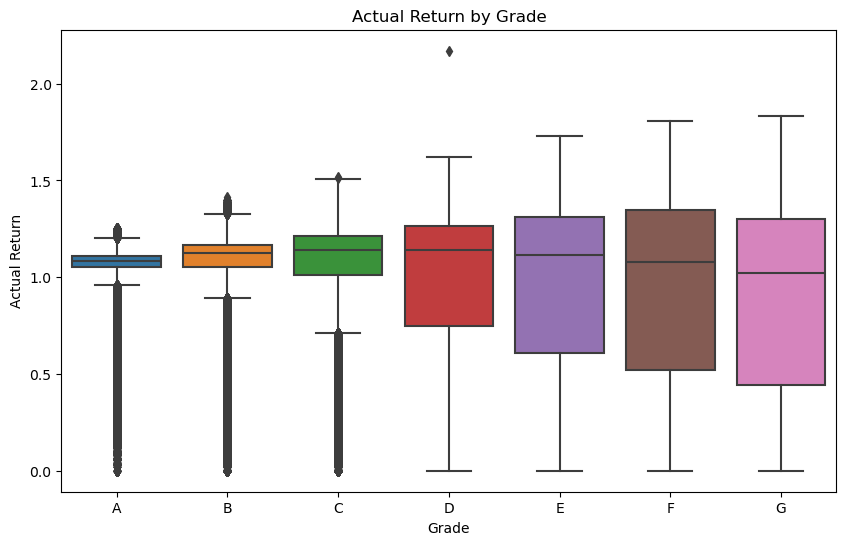

In [13]:
# create a boxplot to show the actual return for each grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='actual_return', data=df8, order=sorted(df8['grade'].unique()))
plt.title('Actual Return by Grade')
plt.xlabel('Grade')
plt.ylabel('Actual Return')

plt.show()



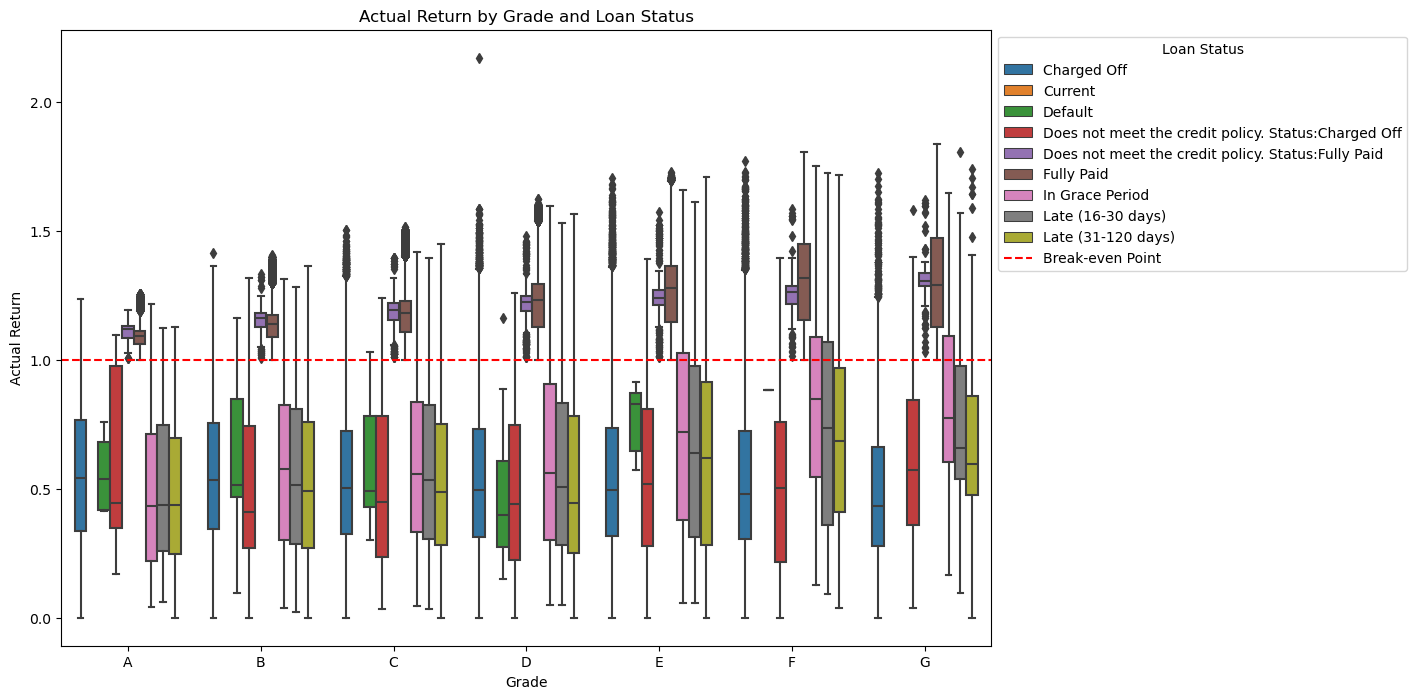

In [14]:
# create a boxplot for the actual return for each grade and loan status make A,B,C,D,E,F,G separately
plt.figure(figsize=(12, 8))
sns.boxplot(x='grade', y='actual_return', hue='loan_status', data=df8, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Actual Return by Grade and Loan Status')
plt.xlabel('Grade')
plt.ylabel('Actual Return')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# draw a line at 1 to indicate the break-even point
plt.axhline(y=1, color='r', linestyle='--', label='Break-even Point')

# put legend outside the boxplot
plt.legend(title='Loan Status', bbox_to_anchor=(1, 1))

plt.show()




In [32]:
df8 = df2[df2['loan_status'] != 'Current']
df8['actual_return'] = df8['total_pymnt']/df8['funded_amnt']
df8 = df8.drop(columns=['loan_status','total_pymnt','funded_amnt','total_pymnt_inv','funded_amnt_inv', 'recoveries','collection_recovery_fee','total_rec_prncp','total_rec_int','last_pymnt_amnt'])
df8

/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_9230/671489870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['actual_return'] = df8['total_pymnt']/df8['funded_amnt']


,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_late_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year,actual_return
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
68407277,3600.0,36,13.99,123.03,C,C4,MORTGAGE,55000.0,Not Verified,0,debt_consolidation,PA,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,13.0,1,0.0,0.0,0.0,564.0,560.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2003,Mar,2019,1.228257
68355089,24700.0,36,11.99,820.28,C,C1,MORTGAGE,65000.0,Not Verified,0,small_business,SD,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,38.0,1,0.0,0.0,0.0,699.0,695.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Dec,1999,Mar,2019,1.039662
68341763,20000.0,60,10.78,432.66,B,B4,MORTGAGE,63000.0,Not Verified,0,home_improvement,IL,0.0,695.0,699.0,0.0,6.0,0.0,7869.0,18.0,1,0.0,0.0,0.0,704.0,700.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Aug,2000,Mar,2019,1.135296
68476807,10400.0,60,22.45,289.91,F,F1,MORTGAGE,104433.0,Source Verified,0,major_purchase,PA,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,35.0,1,0.0,0.0,0.0,704.0,700.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Jun,1998,Mar,2018,1.128894
68426831,11950.0,36,13.44,405.18,C,C3,RENT,34000.0,Source Verified,0,debt_consolidation,GA,0.0,690.0,694.0,0.0,5.0,0.0,8822.0,6.0,1,0.0,0.0,0.0,759.0,755.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2015,Oct,1987,May,2017,1.147192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89905081,18000.0,60,9.49,377.95,B,B2,OWN,130000.0,Not Verified,0,home_improvement,TX,0.0,735.0,739.0,1.0,17.0,0.0,23833.0,39.0,0,0.0,0.0,0.0,709.0,705.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Jul,2004,Mar,2019,1.153124
88948836,29400.0,60,13.99,683.94,C,C3,MORTGAGE,180792.0,Not Verified,0,debt_consolidation,CA,0.0,705.0,709.0,1.0,16.0,0.0,77480.0,32.0,0,0.0,0.0,0.0,719.0,715.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Mar,2002,Jul,2018,1.219346
89996426,32000.0,60,14.49,752.74,C,C4,MORTGAGE,157000.0,Source Verified,0,home_improvement,AZ,0.0,735.0,739.0,0.0,14.0,0.0,111598.0,18.0,0,0.0,0.0,0.0,499.0,0.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2016,Jun,2011,Dec,2018,0.116811


In [24]:
df2['recoveries'].mean()

143.8803804076678

In [15]:
df2['loan_status'].unique()

['Fully Paid', 'Current', 'Charged Off', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Fully..., 'Does not meet the credit policy. Status:Charg...]
Categories (9, object): ['Charged Off', 'Current', 'Default', 'Does not meet the credit policy. Status:Charg..., ..., 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)']

/Users/haoyuanlin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e+02, tolerance: 1.007e+01
  model = cd_fast.enet_coordinate_descent(


Best alpha (lambda): 0.00015637076567159006
Root Mean Squared Error: 0.2206100977592019


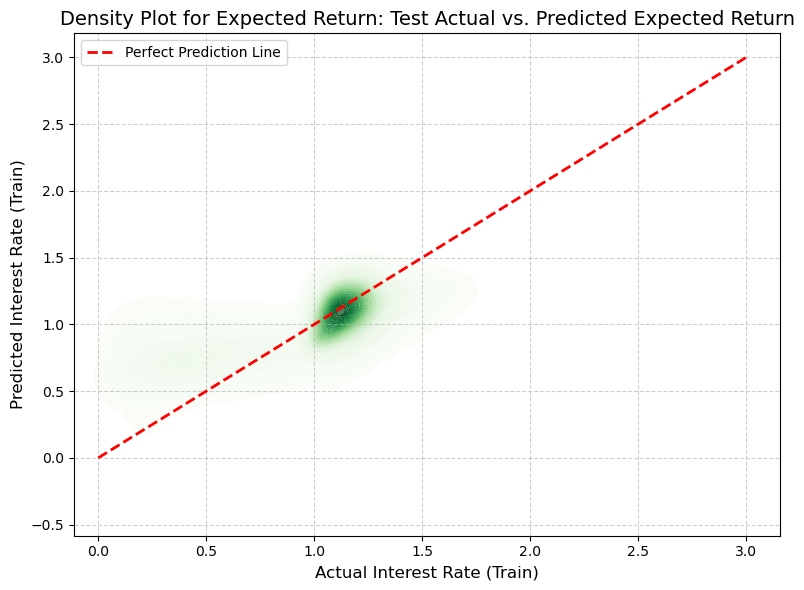

In [37]:
# create a lasso model to predict the actual return using every other features in the dataset
# Prepare the data

df9 = pd.get_dummies(df8, drop_first=True)
# df9 = df9.sample(frac=0.1, random_state=0)
X = df9.drop(columns='actual_return')
Y = df9['actual_return']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit LassoCV (cross-validation to select the best alpha)
lasso_cv = LassoCV(cv=10, random_state=0).fit(X_train_scaled, Y_train)

# Get the coefficients from the LassoCV model
lasso_coefficients = lasso_cv.coef_

# Get the best alpha (lambda) from the LassoCV model
best_alpha = lasso_cv.alpha_

print(f"Best alpha (lambda): {best_alpha}")

# Create a DataFrame to show the features and their corresponding coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso_coefficients
})

coeff_df

# calculate the accuracy of the model using X_test and Y_test
Y_pred = lasso_cv.predict(X_test_scaled)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# find out the top absolute coefficients, in order
coeff_df['Abs_Coefficient'] = coeff_df['Coefficient'].abs()
sorted_coeff = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)
sorted_coeff = sorted_coeff[['Feature', 'Coefficient', 'Abs_Coefficient']]
sorted_coeff['Coefficient'] = pd.to_numeric(sorted_coeff['Coefficient'])
sorted_coeff['Abs_Coefficient'] = pd.to_numeric(sorted_coeff['Abs_Coefficient'])
sorted_coeff = sorted_coeff.round(4)
sorted_coeff.head(50)


# Improved density plot for Train data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Greens", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 3], [0, 3], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Interest Rate (Train)", fontsize=12)
plt.ylabel("Predicted Interest Rate (Train)", fontsize=12)
plt.title("Density Plot for Expected Return: Test Actual vs. Predicted Expected Return", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [36]:
sorted_coeff.head(50)


,Feature,Coefficient,Abs_Coefficient
17,last_fico_range_high,0.1438,0.1438
32,grade_D,0.0740,0.0740
31,grade_C,0.0723,0.0723
33,grade_E,0.0618,0.0618
161,issue_d_year_2018,-0.0536,0.0536
160,issue_d_year_2017,-0.0489,0.0489
269,last_credit_pull_d_year_2019,0.0488,0.0488
14,out_prncp,-0.0453,0.0453
30,grade_B,0.0426,0.0426
34,grade_F,0.0416,0.0416


Test RMSE: 0.16278610029574825
Test R-Squared: 0.7092714372683919
Train RMSE: 0.1119993257107621


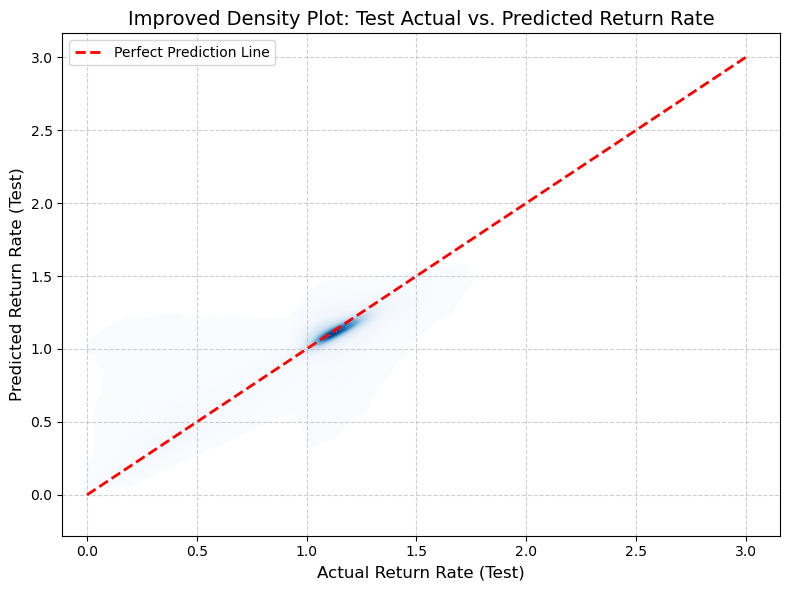

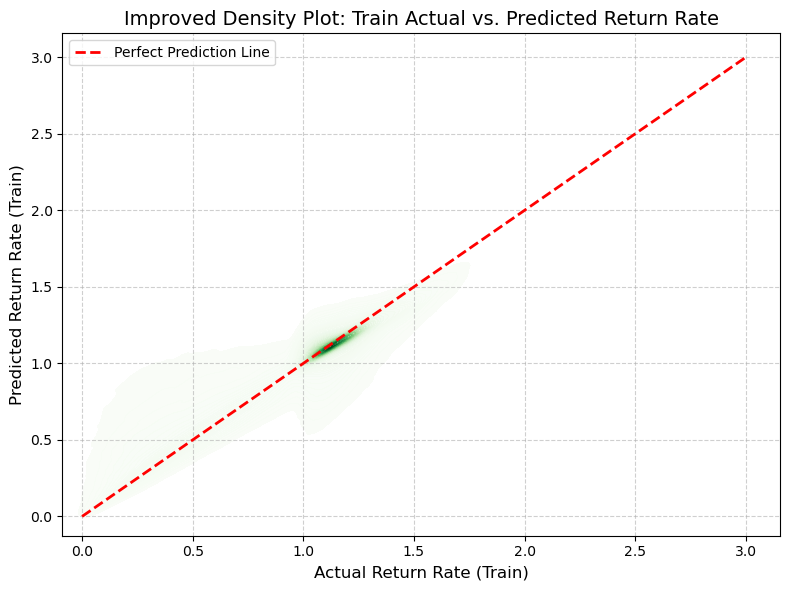

,Feature,Importance
0,loan_amnt,100775.0
17,last_fico_range_high,85075.0
1,int_rate,82218.0
3,annual_inc,67148.0
11,revol_bal,58572.0
2,installment,56105.0
12,total_acc,45391.0
6,fico_range_low,43216.0
9,open_acc,38460.0
8,inq_last_6mths,19591.0


In [39]:
# Train the XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=2000,       
    max_depth=10,            
    learning_rate=0.05,      
    subsample=0.8,          
    colsample_bytree=0.8,   
    random_state=42,
    n_jobs=-1               
)

xgb_model.fit(X_train, Y_train)

# Step 4: Make predictions
Y_pred = xgb_model.predict(X_test)
Y_train_pred = xgb_model.predict(X_train)

# Step 5: Evaluate the model
test_mse = mean_squared_error(Y_test, Y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_pred)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

print(f"Test RMSE: {test_rmse}")
print(f"Test R-Squared: {test_r2}")
print(f"Train RMSE: {train_rmse}")



# Improved density plot for Test data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_test, y=Y_pred, cmap="Blues", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 3], [0, 3], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Return Rate (Test)", fontsize=12)
plt.ylabel("Predicted Return Rate (Test)", fontsize=12)
plt.title("Improved Density Plot: Test Actual vs. Predicted Return Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Improved density plot for Train data
plt.figure(figsize=(8, 6))
sns.kdeplot(x=Y_train, y=Y_train_pred, cmap="Greens", fill=True, thresh=0.01, levels=50, alpha=0.7)
plt.plot([0, 3], [0, 3], color='red', linewidth=2, linestyle='--', label="Perfect Prediction Line")
plt.xlabel("Actual Return Rate (Train)", fontsize=12)
plt.ylabel("Predicted Return Rate (Train)", fontsize=12)
plt.title("Improved Density Plot: Train Actual vs. Predicted Return Rate", fontsize=14)
plt.legend(fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




# Get feature importance scores
importance = xgb_model.get_booster().get_score(importance_type='weight')

# Convert to a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': importance.keys(),
    'Importance': importance.values()
}).sort_values(by='Importance', ascending=False)

importance_df.head(50)


In [ ]:
import pandas as pd

# Define the tranche requirements
tranche_requirements = {
    'Senior': {'grades': ['A', 'B'], 'amount': 400_000_000},
    'Mezzanine': {'grades': ['C', 'D'], 'amount': 400_000_000},
    'Residual': {'grades': ['E', 'F', 'G'], 'amount': 200_000_000},
}

# Initialize an empty list to store the selected loans
selected_loans = []

# Randomly select loans for each tranche
for tranche, details in tranche_requirements.items():
    # Filter loans by grade
    tranche_loans = df8[df8['grade'].isin(details['grades'])]
    
    # Sort loans randomly and use cumulative sum to meet the required amount
    tranche_loans = tranche_loans.sample(frac=1, random_state=42)  # Shuffle the loans
    tranche_loans['cumulative_sum'] = tranche_loans['loan_amnt'].cumsum()
    
    # Select loans until the required amount is met
    selected_tranche_loans = tranche_loans[tranche_loans['cumulative_sum'] <= details['amount']]
    
    # Assign the tranche name to the loans
    selected_tranche_loans['tranche'] = tranche
    
    # Append to the selected loans list
    selected_loans.append(selected_tranche_loans)

# Combine all selected loans into a single DataFrame
abs_tool = pd.concat(selected_loans, axis=0)

# Drop the cumulative_sum column (optional)
abs_tool = abs_tool.drop(columns=['cumulative_sum'])

# Validate the total amounts per tranche
tranche_summary = abs_tool.groupby('tranche').agg(
    total_amount=('loan_amnt', 'sum'),
    loan_count=('loan_amnt', 'count')
).reset_index()

# Display the tranche summary
print("Tranche Summary:")
print(tranche_summary)



/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_9230/714209148.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tranche_loans['tranche'] = tranche


Tranche Summary:
     tranche  total_amount  loan_count
0  Mezzanine   399986625.0       27500
1   Residual   199994825.0       11016
2     Senior   399988225.0       29523


/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_9230/714209148.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tranche_loans['tranche'] = tranche
/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_9230/714209148.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tranche_loans['tranche'] = tranche


In [41]:
tranche_summary

,tranche,total_amount,loan_count
0,Mezzanine,399986625.0,27500
1,Residual,199994825.0,11016
2,Senior,399988225.0,29523


Priority of Cash Flow:

Senior Tranche is prioritized for receiving repayments (both principal and interest) before the Mezzanine and Residual tranches.
After the Senior Tranche is fully paid, the remaining cash flows are directed to the Mezzanine Tranche.
Finally, the Residual Tranche (or equity tranche) receives payments only after all obligations to the Senior and Mezzanine tranches are fulfilled.
Loss Absorption:

Losses are absorbed in reverse order:
Residual Tranche takes the first losses from defaults or underperformance of the loan pool.
If losses exceed the Residual Tranche's value, the Mezzanine Tranche absorbs the next set of losses.
Senior Tranche absorbs losses only after the Residual and Mezzanine tranches are entirely depleted.

In [42]:
abs_tool.head(50)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_rec_late_fee,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_credit_pull_d_month,last_credit_pull_d_year,actual_return,tranche
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102077054,14000.0,36,8.24,440.27,B,B1,RENT,86500.0,Not Verified,0,debt_consolidation,IL,0.0,740.0,744.0,1.0,6.0,0.0,7281.0,25.0,1,0.00,0.00,0.00,789.0,785.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Mar,2017,Nov,2005,Sep,2018,1.097225,Senior
140812553,13800.0,36,10.47,448.34,B,B2,OWN,50000.0,Source Verified,0,credit_card,WA,1.0,730.0,734.0,0.0,8.0,0.0,11306.0,29.0,1,0.00,0.00,0.00,734.0,730.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Oct,2018,Nov,1994,Sep,2018,1.001454,Senior
791823,12000.0,36,10.99,392.81,B,B3,RENT,72000.0,Source Verified,0,other,LA,0.0,720.0,724.0,0.0,4.0,0.0,6375.0,9.0,0,0.00,0.00,0.00,564.0,560.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Jun,2011,Aug,2005,Dec,2017,1.107831,Senior
9002228,6000.0,36,10.99,196.41,B,B2,RENT,30000.0,Not Verified,0,credit_card,NY,0.0,670.0,674.0,2.0,5.0,0.0,2239.0,8.0,0,0.00,0.00,0.00,579.0,575.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Nov,2013,Jun,2010,Oct,2016,0.508997,Senior
42844689,6000.0,36,9.99,193.58,B,B3,RENT,42000.0,Not Verified,0,other,CT,0.0,715.0,719.0,0.0,12.0,0.0,5462.0,20.0,0,0.00,0.00,0.00,694.0,690.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Mar,2015,Dec,2008,Apr,2018,1.161028,Senior
66084421,4000.0,36,9.76,128.62,B,B3,RENT,68000.0,Verified,0,debt_consolidation,NJ,4.0,680.0,684.0,0.0,22.0,0.0,3662.0,30.0,1,0.00,0.00,0.00,684.0,680.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Nov,2015,Jan,1984,Aug,2018,1.142200,Senior
63898933,25000.0,36,5.32,752.87,A,A1,MORTGAGE,165000.0,Verified,0,major_purchase,NJ,0.0,740.0,744.0,0.0,8.0,0.0,247.0,20.0,0,0.00,0.00,0.00,759.0,755.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Nov,2015,Jun,2006,Nov,2018,1.083836,Senior
3108550,14000.0,36,8.90,444.55,A,A5,RENT,114000.0,Verified,0,credit_card,NV,0.0,720.0,724.0,1.0,12.0,0.0,11118.0,38.0,0,0.00,0.00,0.00,644.0,640.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Jan,2013,Nov,2000,May,2016,1.035285,Senior
2308002,12000.0,36,8.90,381.04,A,A5,MORTGAGE,60000.0,Not Verified,0,credit_card,CA,0.0,705.0,709.0,0.0,14.0,0.0,21449.0,30.0,0,0.00,0.00,0.00,794.0,790.0,0.0,1.0,1,0.0,0.0,0.0,0.0,0,1,0,Dec,2012,Jan,2002,Feb,2015,1.132098,Senior


In [ ]:
master = pd.read_csv('Master_Loan_Summary.csv')
prosper = master[master['data_source'] == 'Prosper']
# rename the prosepr listing_title to purpose, fill the NaN with 'Unknown'
prosper['purpose'] = prosper['listing_title']
prosper['purpose'] = prosper['purpose'].fillna('Unknown')
prosper = prosper.drop(columns=['listing_title'])
prosper['term'] = prosper['term'].astype('category')
prosper['borrower_rate'] = prosper['borrower_rate']*100
prosper['origination_year'] = prosper['origination_date'].str[:4].astype('category')
prosper['origination_month'] = prosper['origination_date'].str[5:7].astype('category')
prosper = prosper.drop(columns=['origination_date'])
prosper


/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_49548/236171502.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  master = pd.read_csv('Master_Loan_Summary.csv')
/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_49548/236171502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prosper['purpose'] = prosper['listing_title']
/var/folders/1g/y4pq34l1271bmsqn42shn0100000gn/T/ipykernel_49548/236171502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,purpose,origination_year,origination_month
1961527,80355,5000.0,36,25.66,200.548615,E,0.00,5000.00,1793.31,0.0,0.0,2015-07-04,2016-01-04,0,COMPLETED,Prosper,Unknown,2013,01
1961528,80708,15500.0,36,16.79,550.998674,C,0.00,15500.00,3452.00,0.0,0.0,2015-06-04,2016-01-04,0,COMPLETED,Prosper,Unknown,2013,01
1961529,80800,10000.0,60,25.57,296.864320,E,0.00,10000.00,4084.82,0.0,0.0,2015-09-07,2018-01-07,0,COMPLETED,Prosper,Unknown,2013,01
1961530,81062,15000.0,60,17.52,376.995481,C,0.00,15000.00,4133.78,0.0,0.0,2015-10-07,2018-01-07,0,COMPLETED,Prosper,Unknown,2013,01
1961531,80676,2500.0,36,7.89,78.214113,A,0.00,2499.99,228.74,0.0,0.0,2015-04-07,2016-01-07,0,COMPLETED,Prosper,Unknown,2013,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875141,1081905,10000.0,36,9.34,319.582092,B,9667.17,332.83,86.75,0.0,0.0,2018-09-29,2018-08-29,0,CURRENT,Prosper,Unknown,2018,06
2875142,1081908,10000.0,36,12.14,332.812163,C,9766.97,233.03,99.78,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper,Unknown,2018,06
2875143,1081947,4000.0,60,24.55,116.352367,E,3964.36,35.64,80.71,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper,Unknown,2018,06
2875144,1081797,30000.0,60,18.78,774.589469,D,29688.48,311.52,463.07,0.0,0.0,2018-08-29,2018-08-29,0,CURRENT,Prosper,Unknown,2018,06


In [ ]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913619 entries, 1961527 to 2875145
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   loan_number                  913619 non-null  int64   
 1   amount_borrowed              913619 non-null  float64 
 2   term                         913619 non-null  category
 3   borrower_rate                913619 non-null  float64 
 4   installment                  913619 non-null  float64 
 5   grade                        913619 non-null  object  
 6   principal_balance            913619 non-null  float64 
 7   principal_paid               913619 non-null  float64 
 8   interest_paid                913619 non-null  float64 
 9   late_fees_paid               913619 non-null  float64 
 10  debt_sale_proceeds_received  913619 non-null  float64 
 11  last_payment_date            913619 non-null  object  
 12  next_payment_due_date        913619 n